# **Crop Recommendation System**

Precision agriculture is a modern farming technique that uses the data of soil charachteristics, soil types, crop yield data, weather conditions and suggests the farmers with the most optimal crop to grow in their farms for maximum yield and profit. This technique can reduce the crop failures and will help the farmers to take informed decision about their farming strategy.

In order to mitigate the agrarian crisis in the current status, there is a need for better recommendation systems to alleviate the crisis by helping the farmers to make an informed decision before starting the cultivation of crops.



**Aim : To build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.**

https://www.kaggle.com/atharvaingle/crop-recommendation-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Import required packages

In [ ]:
pip install squarify

In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 14 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
pip install pywaffle

     |████████████████████████████████| 526 kB 5.1 MB/s 


In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.collections import PathCollection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline
import squarify
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import zscore
from pywaffle import Waffle
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
import tensorflow.keras.backend as K
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import VotingClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Read the data from csv file

In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset/Crop_recommendation.csv')
df1=df.copy()
df.head(10)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

# Analysing the dataset and get important statistical summary

**Data fields :**


N            - Ratio of Nitrogen content in soil

P            - Ratio of Phosphorous content in soil

K            - Ratio of Potassium content in soil

Temperature  - Temperature in degree Celsius

Humidity     - Relative humidity in %

pH           - pH value of the soil

Rainfall     - Rainfall in mm

In [ ]:
# Size of the dataset
df.size

17600

In [ ]:
# Shape of the dataset
df.shape

(2200, 8)

In [ ]:
# Different columns of the dataset
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# Statistical description of the dataset
df.describe()

N            P  ...           ph     rainfall
count  2200.000000  2200.000000  ...  2200.000000  2200.000000
mean     50.551818    53.362727  ...     6.469480   103.463655
std      36.917334    32.985883  ...     0.773938    54.958389
min       0.000000     5.000000  ...     3.504752    20.211267
25%      21.000000    28.000000  ...     5.971693    64.551686
50%      37.000000    51.000000  ...     6.425045    94.867624
75%      84.250000    68.000000  ...     6.923643   124.267508
max     140.000000   145.000000  ...     9.935091   298.560117

[8 rows x 7 columns]

In [ ]:

# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# Column types
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object



**Type of attributes :**


N - Ratio scaled attribute

P - Ratio scaled attribute

K - Ratio scaled attribute

temperature - Interval scaled attribute

humidity - Ratio scaled attribute

rainfall - Ratio scaled attribute

label - Nominal attribute

In [ ]:
# Unique values in each column
df.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [ ]:
# Unique output labels (crops)
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
# No of crops in each variety
df['label'].value_counts()

mango          100
blackgram      100
kidneybeans    100
grapes         100
coffee         100
cotton         100
muskmelon      100
watermelon     100
banana         100
pigeonpeas     100
pomegranate    100
orange         100
rice           100
maize          100
jute           100
apple          100
mothbeans      100
chickpea       100
lentil         100
mungbean       100
papaya         100
coconut        100
Name: label, dtype: int64

## Handling Missing Values

In [ ]:
# No of null values in the dataset
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

***There are no missing values.***

# Handling outliers

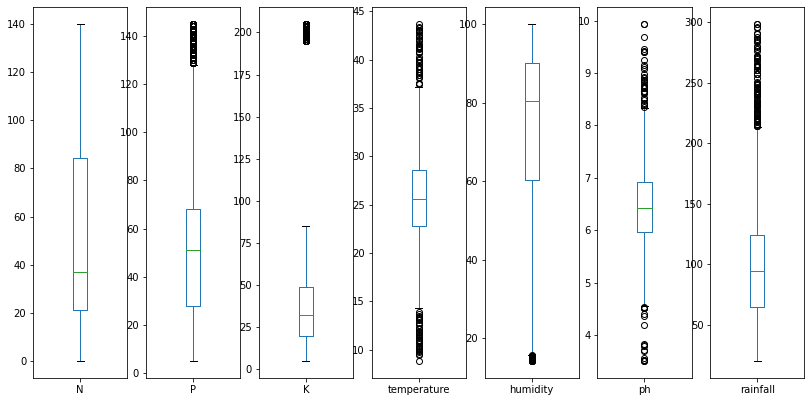

In [ ]:
# Boxplot of each attribute to see whether there is any outliers
df.plot(kind='box', subplots=True, layout=(2,15), figsize=(30, 15));

***Outliers are present in P, K, temperature, humidity, ph and rainfall attributes***

In [ ]:
# Function to find lower and upper bound for each attribute
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1 = np.percentile(datacolumn , 25, interpolation = 'midpoint')
 Q3 = np.percentile(datacolumn, 75, interpolation = 'midpoint') 
 IQR = Q3-Q1
 lower_range = Q1- (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
# Function to replace the outlier values with null values
def replace_outliers_null(datacolumn):
  lowerbound,upperbound = outlier_treatment(datacolumn)
  df.loc[((datacolumn<lowerbound) | (datacolumn>upperbound)),datacolumn.name]=np.NaN

In [ ]:
# Function to check for outliers and replace it with mean values of each column since all attribues are either ratio scaled / interval scaled
def replace_outliers():
  flag = True
  while(flag):
    for col in df.columns:
      if(col!='label'):
        replace_outliers_null(df[col])
    if(df.isnull().sum().sum()==0):
      flag = False
    else:
      df.fillna(df.median(),inplace=True)

In [ ]:
# Calling the function to replace outliers
replace_outliers()

In [ ]:
# Checking whether all outliers have been replaced
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

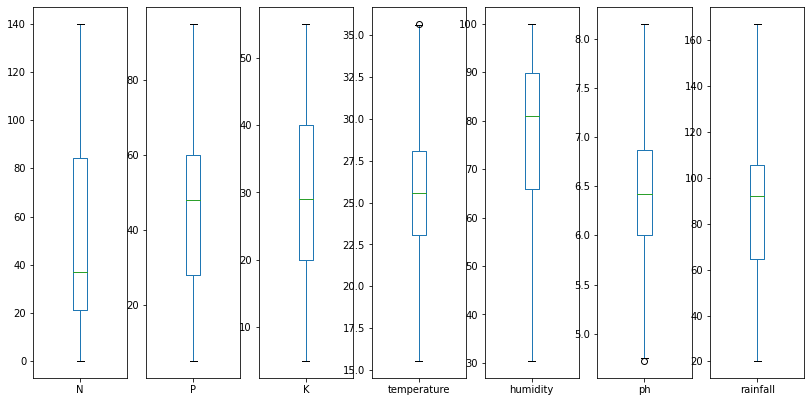

In [ ]:
# Boxplot of each attribute to verify that all the outliers have been replaced or not
df.plot(kind='box', subplots=True, layout=(2,15), figsize=(30, 15));

# Encoding

In [ ]:
le = LabelEncoder()
le.fit(df['label'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


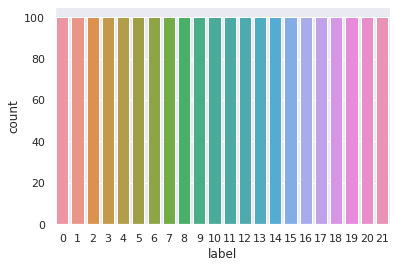

In [ ]:
# Transforming the labels into numerical values using LabelEncoder
df['label'] = le.fit_transform(df['label'])
sns.set(style ='darkgrid')
sns.countplot(x=df['label']);

In [ ]:
# Checking the transformed labels
sorted(df['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

#Min-Max Normalization

In [ ]:
# Splitting the dataset into features (input) and target (output label)
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [ ]:
# Normalizing input values to lie between 0 and 1 using MinMaxScaler
x = features.values 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
features_norm = pd.DataFrame(x_scaled)
features_norm.columns = features.columns
features_norm.head()

N         P     K  temperature  humidity        ph  rainfall
0  0.642857  0.411111  0.76     0.265235  0.741610  0.519052  0.488867
1  0.607143  0.588889  0.72     0.309465  0.717421  0.675024  0.488867
2  0.428571  0.555556  0.78     0.370741  0.746181  0.908821  0.488867
3  0.528571  0.333333  0.70     0.543876  0.715103  0.658207  0.488867
4  0.557143  0.411111  0.74     0.228014  0.735892  0.847106  0.488867

#Z- Score Normalization

In [ ]:
cols = list(df.columns)
cols.remove('label')
df[cols].apply(zscore)

N         P         K  temperature  humidity        ph  rainfall
0     1.068797 -0.171242  1.032734    -1.158025  0.329666  0.078431  0.184127
1     0.933329  0.589547  0.870238    -0.933420  0.216956  0.923546  0.184127
2     0.255986  0.446899  1.113982    -0.622251  0.350962  2.190340  0.184127
3     0.635298 -0.504088  0.788990     0.256948  0.206156  0.832426  0.184127
4     0.743673 -0.171242  0.951486    -1.347039  0.303022  1.855943  0.184127
...        ...       ...       ...          ...       ...       ...       ...
2195  1.529390 -0.551637  0.139008     0.328446 -0.714292  0.516028  0.184127
2196  1.312641 -1.455074 -0.267232     0.490455 -1.369007 -0.578668  1.316483
2197  1.827421 -0.599186 -0.023488    -0.337979 -0.659925 -0.143271  0.184127
2198  1.800327 -0.646736  0.301503     0.201806 -1.670953  0.482434  1.292865
2199  1.448109 -1.312426 -0.023488    -0.471318 -1.117209  0.515663  1.726635

[2200 rows x 7 columns]

Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.

# PCA

In [ ]:
scalar = StandardScaler() 
# fitting
scalar.fit(features_norm)
scaled_data = scalar.transform(features_norm)
#components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data) 
x_pca.shape

(2200, 2)

Text(0, 0.5, 'Second Principal Component')

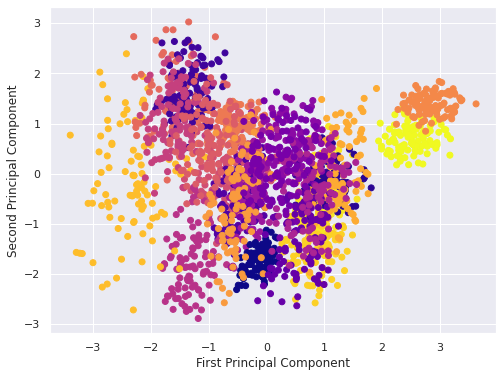

In [ ]:
# giving a larger plot
plt.figure(figsize =(8, 6)) 
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = df['label'], cmap ='plasma') 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
# components
pca.components_

array([[ 0.48954868, -0.358235  ,  0.61951834,  0.03333397,  0.48486966,
         0.02159588, -0.10738104],
       [ 0.21836694,  0.04910252, -0.01800564,  0.55205642, -0.34965971,
         0.40621242, -0.59794973]])

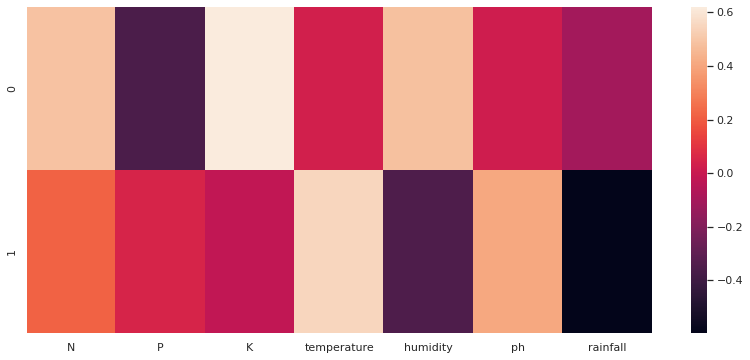

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns = df.columns[:7]) 
plt.figure(figsize =(14, 6))
# plotting heatmap
sns.heatmap(df_comp)

Inference :

Attributes like rainfall and humidity are strongly negatively correlated whereas temperature, pH and N are strongly positively correlated with principal component 1.

Attributes like rainfall and P are strongly negatively correlated whereas K, N and humidity are strongly positively correlated with principal component 0.

Since there are only 7 attributes, PCA is not needed for this model and without PCA itself accuracy will be good.

# Data Visualization

In [ ]:
sns.set_style("white")

**Univariate Analysis:**

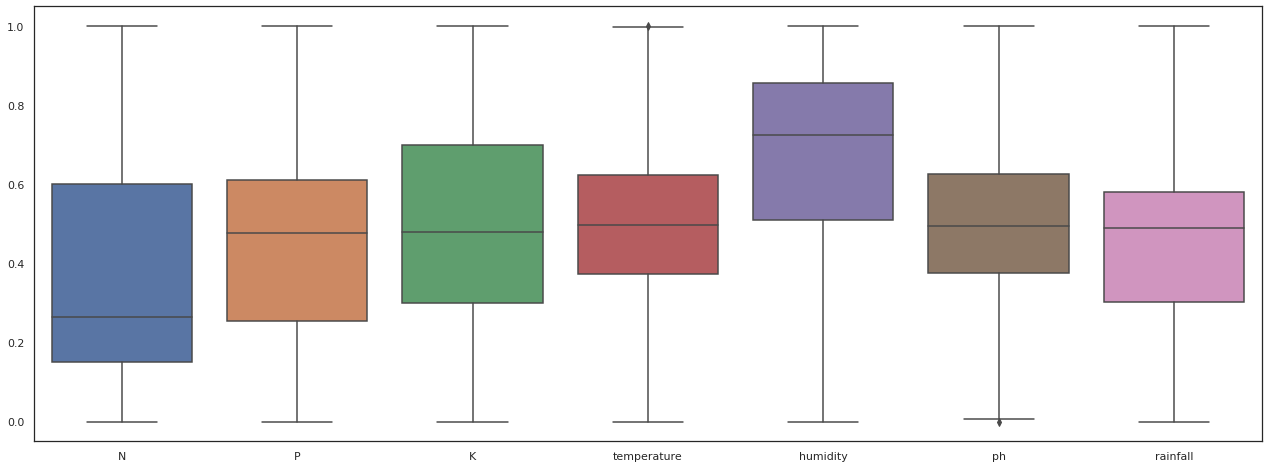

In [ ]:
fig = plt.figure(figsize=(22,8))
sns.boxplot(data=features_norm);

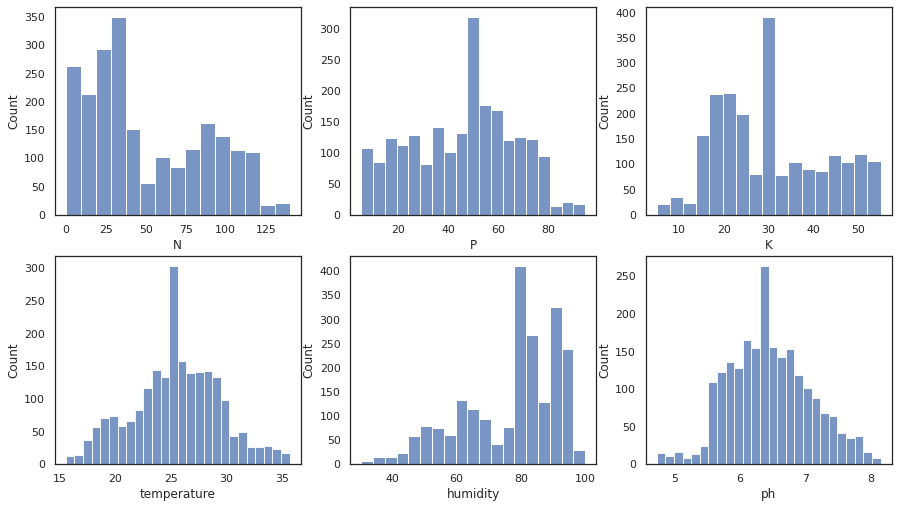

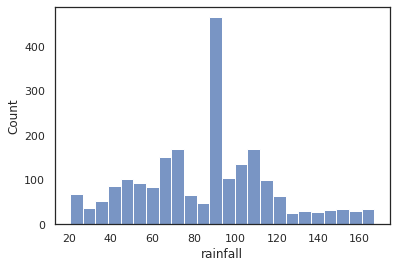

In [ ]:
all_columns = df.columns[:-1]
plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(df[column])
    i+=1
plt.show()
sns.histplot(df[all_columns[-1]])
plt.show()

1. Statistical Analysis

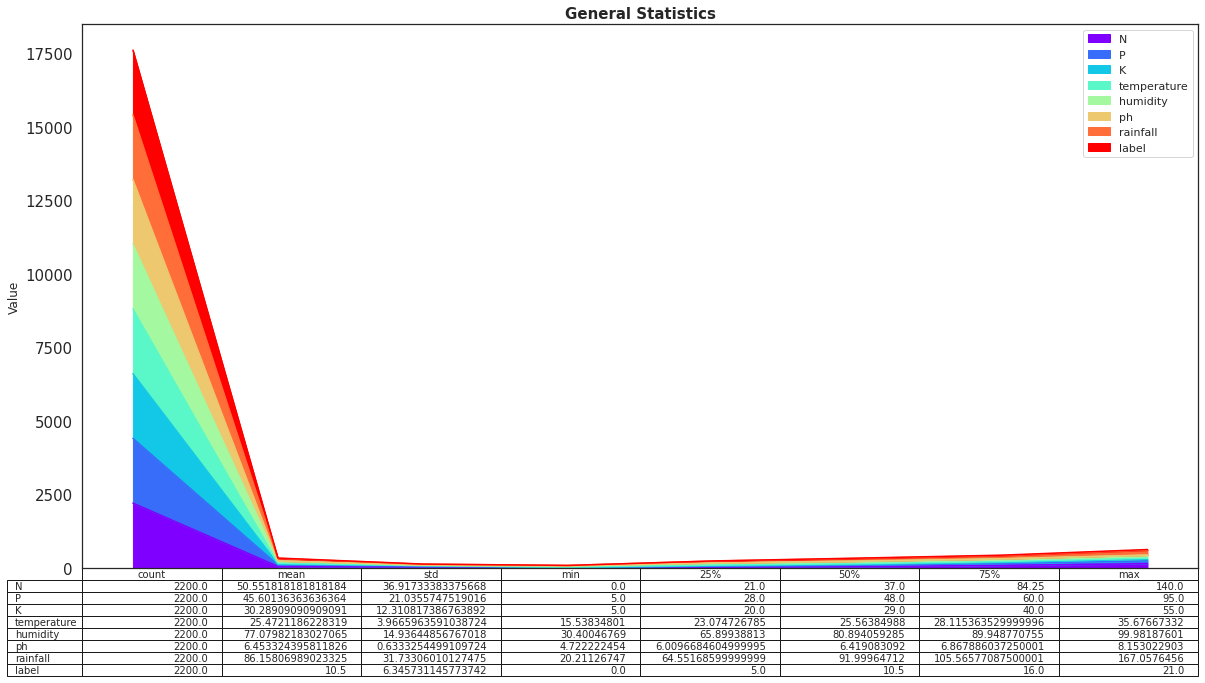

In [ ]:
frame1=df.describe().plot(kind = "area",fontsize=15, figsize = (20,10), table =True,colormap="rainbow",stacked=True)
plt.ylabel('Value',fontsize=12)
plt.title("General Statistics",fontweight='bold',fontsize=15)
frame1.axes.get_xaxis().set_visible(False)
plt.show()

**Inference:**
 
  The plot takes the input of describe() function and the output is the visualization of the details.

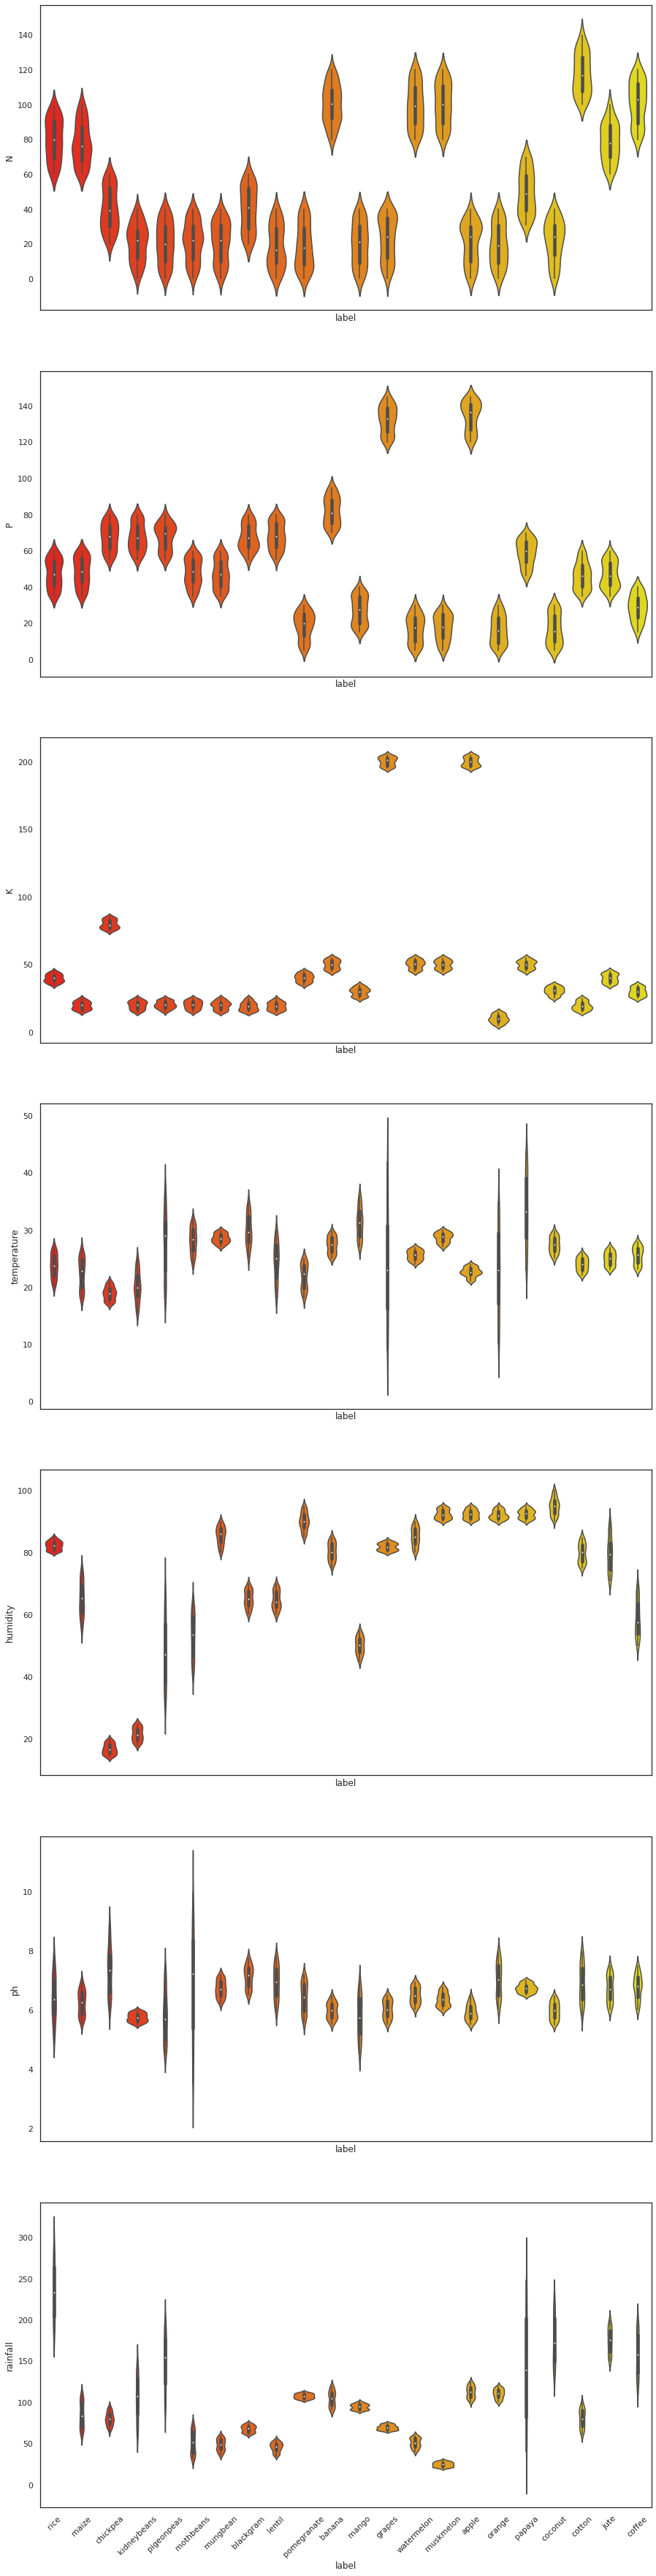

In [ ]:
# Technique: Violin plot is used to plot the variation between the attributes with the crops. Seaborn package is used for visualization.
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
fig, ax = plt.subplots(7, 1, figsize=(15, 63), sharex=True)
i = 0
for column in columns:
    sns.violinplot(data=df1, x=df1.label, y=column,palette='autumn', ax=ax[i])
    plt.xticks(rotation=45)
    i = i + 1
plt.show()

**Inference:** 
1. Among all the crops, muskmelon cultivation has the lowest rainfall and rice cultivation has the highest rainfall.
2. Papaya, Orange, apple and muskmelon requires the same amount of humidity in the range of 80 - 100.
3. Apple and grapes require high potassium and phospherous in the soil for cultivation.
4. Cotton, Jute and coffee requires a Ph level of 6-8.
5. Mothbeans require a median Ph of around 7.


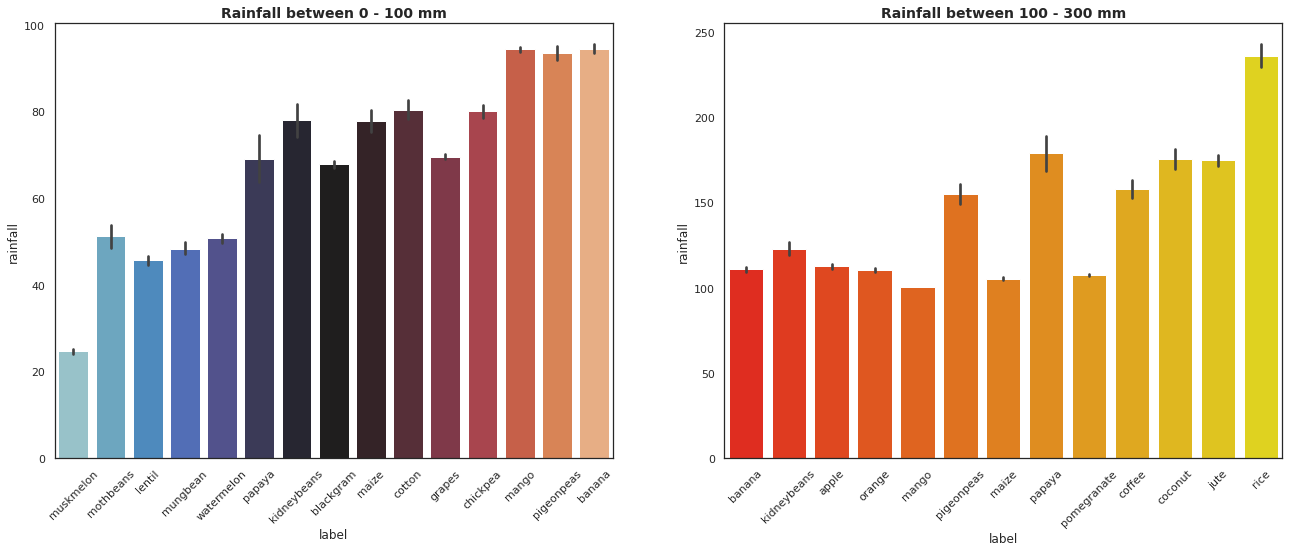

In [ ]:
#Technique: Barplot is used to denote the rainfall ratio for the given crops
fig = plt.figure(figsize=(22,8))
df_sort =  df1.sort_values(by='rainfall')
fig.add_subplot(121)
plt.title('Rainfall between 0 - 100 mm',fontweight='bold', fontsize=14)
sns.barplot(data=df_sort[df_sort['rainfall']<100], x='label',y='rainfall',palette='icefire')
plt.xticks(rotation=45)
fig.add_subplot(122)
plt.title('Rainfall between 100 - 300 mm',fontweight='bold', fontsize=14)  
sns.barplot(data=df_sort[df_sort['rainfall']>100],  x='label',y='rainfall',palette='autumn')
plt.xticks(rotation=45)
plt.show()

**Inference:**
1. It can be noted from the second graph that, to cultivate crops such as bananas, coconut, jute, pigeonpeas, coffee, papaya and rice, the region should have rainfall greater than 100mm.
2. Lentil, mugbean and watermelon requires a rainfall around 40 mm to 60 mm.
3. Maize and Pomegranate requires 100mm rainfall on an average.

In [ ]:
x=df1.groupby("label")['K'].mean().to_frame().reset_index()
x=x.sort_values(by='K')

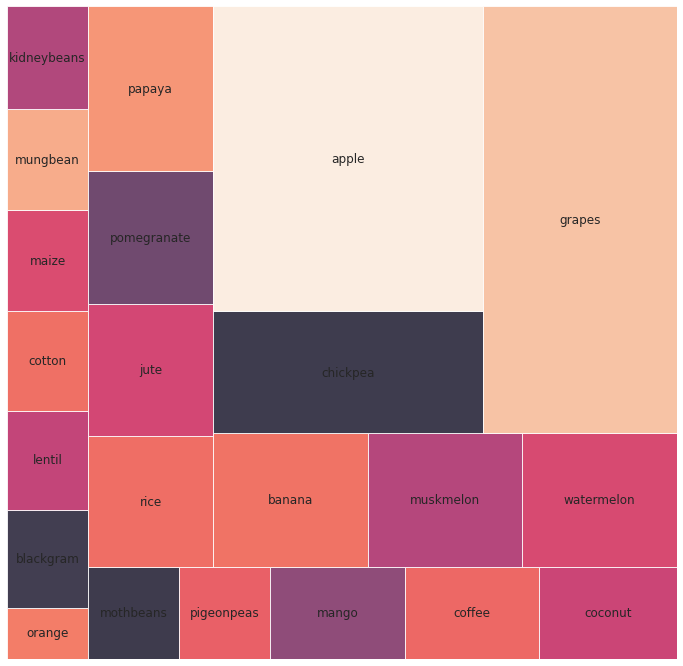

In [ ]:
#Technique: Treemap is used to visualize the average Potassium for each graph
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=x['K'], 
              label=x['label'], 
              alpha=.8 )
plt.axis('off')
plt.show()

**Inference:**
1. Apple and grapes require high potassium level.
2. Orange requires lowest potassium level.
3. Pomegranate, Jute, rice requires the same amount of potassium on an average scale.

In [ ]:
#Technique: Treemap is used to find humidity and temperature based on labels 
fig = px.treemap(df1,path=['label', 'humidity'],values='temperature',color='rainfall')
fig.show()

**Inference:**
1. ChickBeans has an average rainfall around 80mm and requires an average temperaature of around 17  degree C.
2. Papaya can grow on lands irrespective of the amount of rainfall and temperature of average 30 degree C.

<Figure size 1368x1224 with 0 Axes>

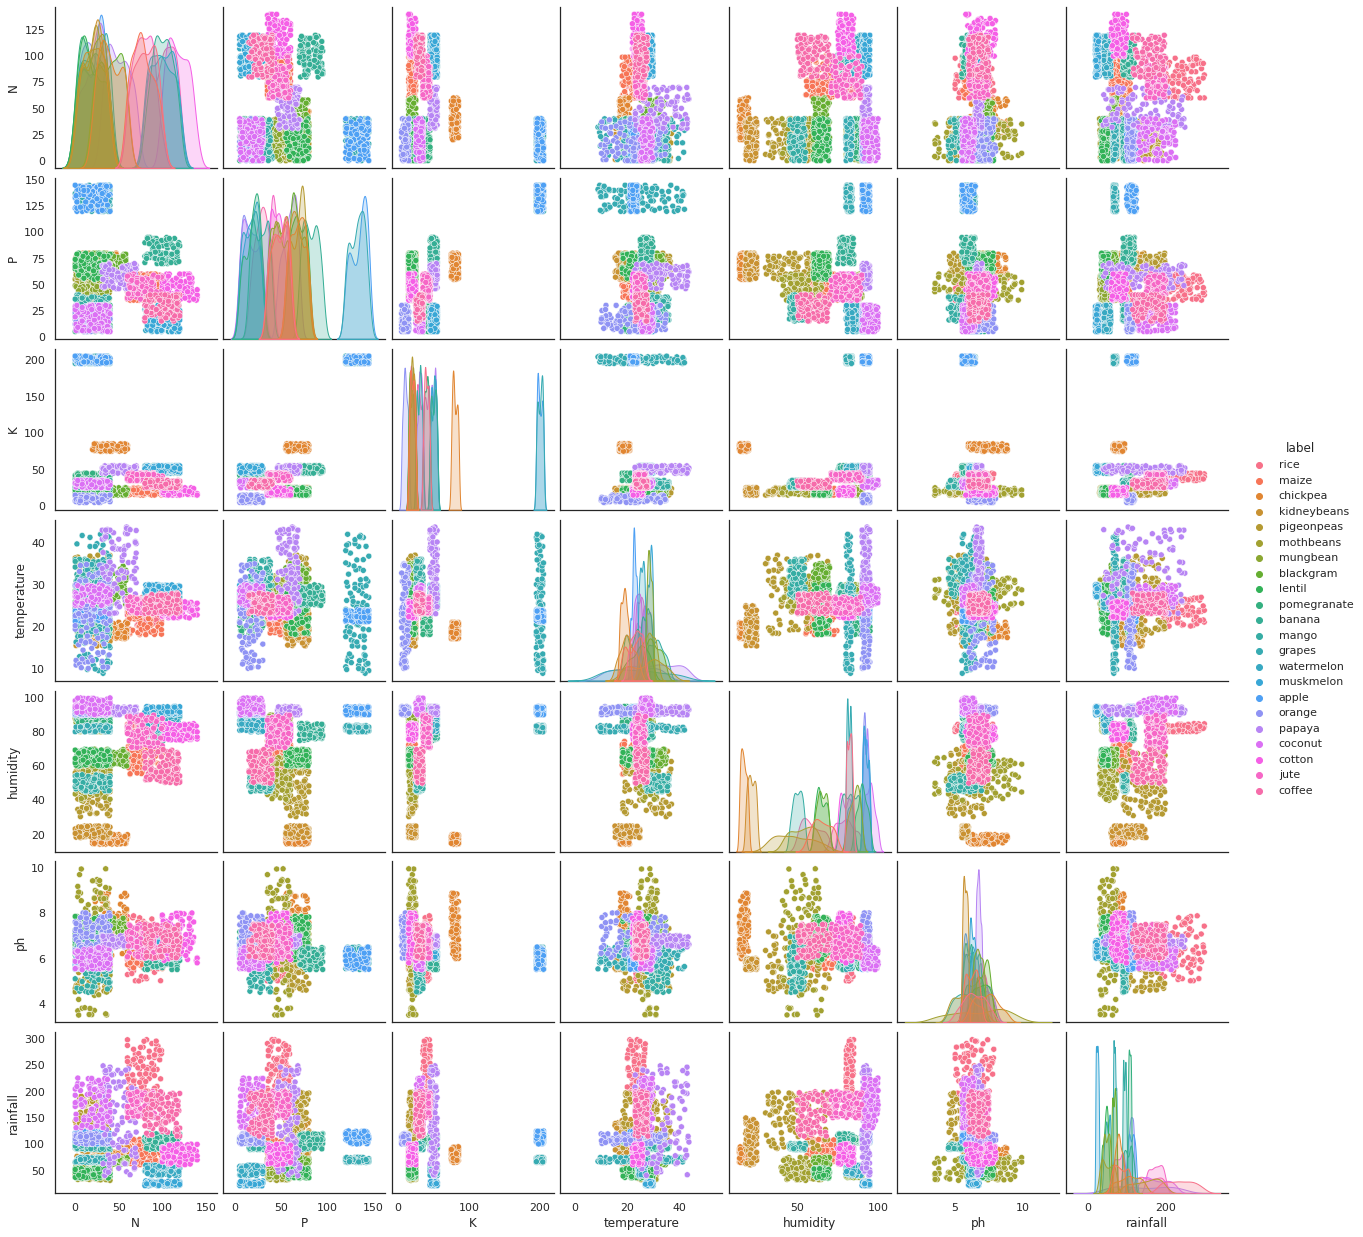

In [ ]:
#Technique: Pairplot is used to find relationship among the attributes
plt.figure(figsize=(19,17))
sns.pairplot(df1, hue = "label")
plt.show()

**Inference:**
1. Papaya and orange grows in high humidity temperature.
2. Ph of apple is around 6 while its Phospherous is above 100.


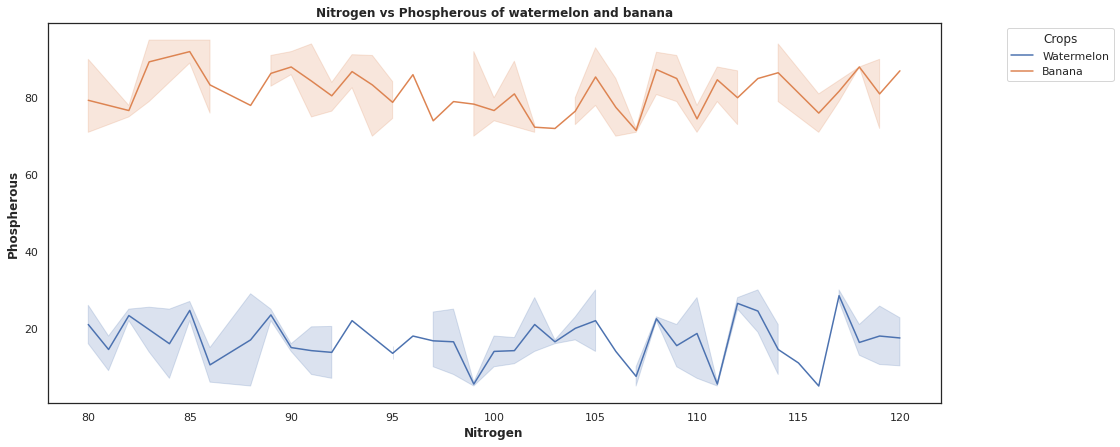

In [ ]:
#Technique: Line Plot is used to find the relationship between watermelon and banana
water = df1.loc[df1.loc[:, 'label']=='watermelon',:]
ban = df1.loc[df1.loc[:, 'label']=='banana',:]
plt.figure(figsize=(16,7))
plt.title("Nitrogen vs Phospherous of watermelon and banana",fontweight='bold',fontsize=12)
lp_water = sns.lineplot(x = 'N' , y = 'P' , data =water)
plt.xlabel('Nitrogen',fontweight='bold',fontsize=12)
plt.ylabel('Phospherous',fontweight='bold',fontsize=12)
lp_ban = sns.lineplot(x = 'N' , y = 'P' , data = ban)
leg1 = plt.legend(['Watermelon','Banana'],title='Crops',bbox_to_anchor=(1.2,1))
plt.show()

**Inference:**
1. Watermelon is cultivated in the soil having Phospherous level greater than 70.
2. Banana is cultivated in the soil having Phospherous level less than 20.
3. In both the cases, Nitrogen level lies between 80 to 120.

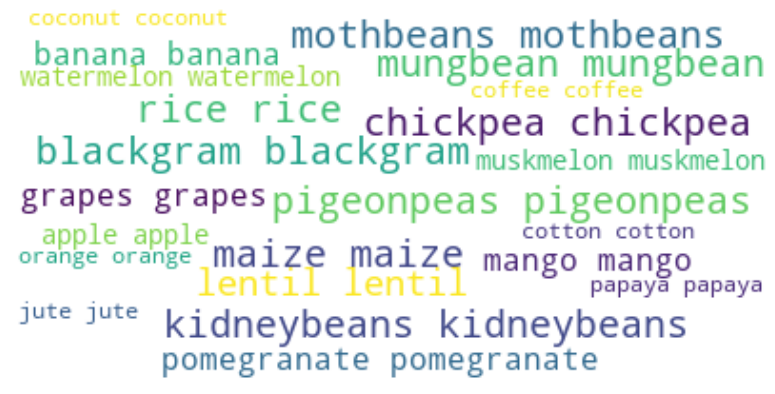

In [ ]:
#Technique: WOrdcloud is used to see what crop takes most rows in the given dataset
from wordcloud import WordCloud
plt.figure(figsize=(25,7))
text = " ".join(c for c in df1.label)
word_cloud = WordCloud(max_font_size=20, max_words=2200, background_color="white").generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Inference:**
 This shows that there is no bias in the dataset

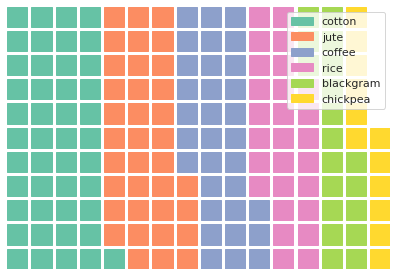

In [ ]:
#Technique: Waffle chart is used to count the crops given a certain criteria
count=df1.loc[(df1['N']>50)
        &(df['ph']>7),'label'].value_counts().to_frame()
fig = plt.figure(FigureClass = Waffle,
                 rows = 11,values = count.label,
                 labels = list(count.index))

**Inference:**
1. The crops which require Nitrogen more than 50 and Ph more than 7 are Cotton, Jute, Coffee, Rice, Blackgram and Chickpea.

**Inference:**
1. Rice and Maize take up most of the dataset.
2. Coffee, muskmelon, cotton, jute, apple takes up less of the dataset.

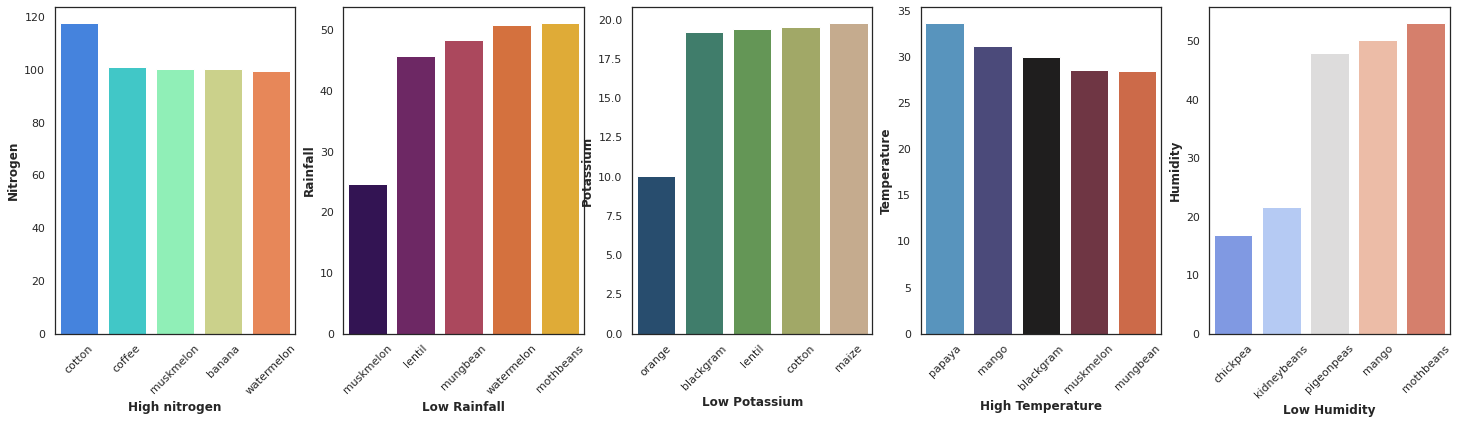

In [ ]:
#Tecnique: Bar graph is used to find the top and least crops associated with each attribute
plt.figure(figsize=(25,6))
plt.subplot(1,5,1)
top1=df1.groupby('label')['N'].mean().to_frame().reset_index()
top1=top1.nlargest(5,'N')
sns.barplot(x=top1.label,y=top1.N,palette='rainbow')
plt.xticks(rotation=45)
plt.ylabel("Nitrogen" ,fontweight='bold',fontsize=12)
plt.xlabel("High nitrogen",fontweight='bold',fontsize=12)


plt.subplot(1,5,2)
top2=df1.groupby('label')['rainfall'].mean().to_frame().reset_index()
top2=top2.nsmallest(5,'rainfall')
sns.barplot(x=top2.label,y=top2.rainfall,palette='inferno')
plt.xticks(rotation=45)
plt.xlabel("Low Rainfall" ,fontweight='bold',fontsize=12)
plt.ylabel("Rainfall",fontweight='bold',fontsize=12)

plt.subplot(1,5,3)
top3=df1.groupby('label')['K'].mean().to_frame().reset_index()
top3=top3.nsmallest(5,'K')
sns.barplot(x=top3.label,y=top3.K,palette='gist_earth')
plt.xticks(rotation=45)
plt.xlabel("Low Potassium" ,fontweight='bold',fontsize=12)
plt.ylabel("Potassium",fontweight='bold',fontsize=12)

plt.subplot(1,5,4)
top4=df1.groupby('label')['temperature'].mean().to_frame().reset_index()
top4=top4.nlargest(5,'temperature')
sns.barplot(x=top4.label,y=top4.temperature,palette='icefire')
plt.xticks(rotation=45)
plt.xlabel("High Temperature" ,fontweight='bold',fontsize=12)
plt.ylabel("Temperature",fontweight='bold',fontsize=12)

plt.subplot(1,5,5)
top5=df1.groupby('label')['humidity'].mean().to_frame().reset_index()
top5=top5.nsmallest(5,'humidity')
sns.barplot(x=top5.label,y=top5.humidity,palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Low Humidity" ,fontweight='bold',fontsize=12)
plt.ylabel("Humidity",fontweight='bold',fontsize=12)

plt.show()

**Inference:**
1. Cotton requires the highest nitrogen.
2. Mothbeans is the fifth lowest crop that requires less rainfall.
3. Orange requires the lowest Potassium.
4. Kidney beans require the second least humidity to grow.
5. Papaya requires on a maximum scale, high temperature to grow.

In [ ]:
'''#Technique: lmplot is used to differentiate between humidity and temperature for various crops
g = sns.scatterplot(x="humidity", y="temperature", hue="label", truncate=True, height=7, data=df1, palette='cividis')
g.set_axis_labels("Humidity", "Temperature")                                                       
plt.title('Humidy Vs. Temperature' ,fontweight='bold',fontsize=20)
plt.ylabel("Temperature" ,fontweight='bold',fontsize=15)
plt.xlabel("Humidity",fontweight='bold',fontsize=15)
plt.show()'''

'#Technique: lmplot is used to differentiate between humidity and temperature for various crops\ng = sns.scatterplot(x="humidity", y="temperature", hue="label", truncate=True, height=7, data=df1, palette=\'cividis\')\ng.set_axis_labels("Humidity", "Temperature")                                                       \nplt.title(\'Humidy Vs. Temperature\' ,fontweight=\'bold\',fontsize=20)\nplt.ylabel("Temperature" ,fontweight=\'bold\',fontsize=15)\nplt.xlabel("Humidity",fontweight=\'bold\',fontsize=15)\nplt.show()'

**Inference:**
1. Rice requires  humidity around 20% and temperature around 20 degree Celcius
2. Papaya and coconut requires high humidity and temperature.
3. Mango and grapes require a humidity around 80%.

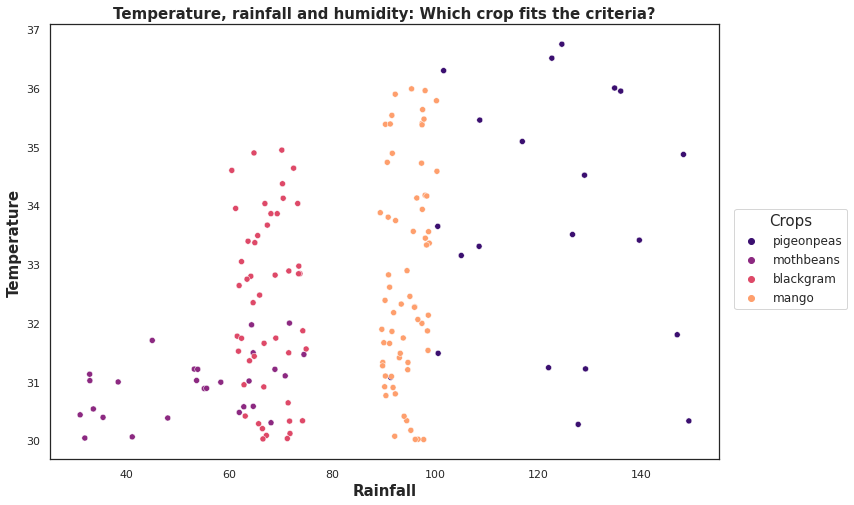

In [ ]:
#Technique: Scatter plot is used to find thecrop that best fits the category
plt.figure(figsize=(12,8))
df2=df1.loc[(df1['temperature']>30)&(df1['rainfall']<150)&(df1['humidity']<70),:]
sns.scatterplot(data=df2,x='rainfall',y='temperature',palette='magma',hue='label')
plt.title('Temperature, rainfall and humidity: Which crop fits the criteria?',fontweight='bold',fontsize=15)
plt.xlabel("Rainfall" ,fontweight='bold',fontsize=15)
plt.ylabel("Temperature",fontweight='bold',fontsize=15)
plt.legend(title='Crops',bbox_to_anchor=(1.2, 0.59),fontsize=12,title_fontsize=15)
plt.show()

**Inference:**
1. Pigeonpeas, mothbeans, blackgram and mango fit into the category of criterias where Temperature greater that 30 degree C, rainfall less than 150mm and humidity less than 70%.

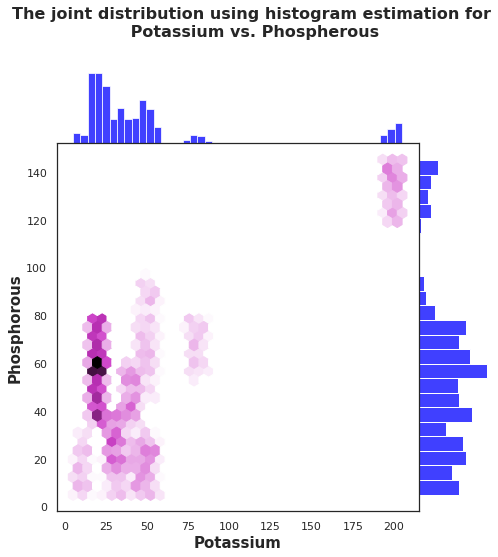

In [ ]:
sns.jointplot(data=df1,x='K',y='P', kind="hex", height=7,color='orchid', space=0, marginal_kws={'color': 'blue'})
plt.suptitle('The joint distribution using histogram estimation for\n Potassium vs. Phospherous',position=(0.5,1.1),fontweight='bold',fontsize=16)
plt.xlabel("Potassium" ,fontweight='bold',fontsize=15)
plt.ylabel("Phosphorous",fontweight='bold',fontsize=15)
plt.show()

**Inference:**
 ‘hex’ bins the data into hexagons with histograms in the margins.
 This plot shows empirical distribution for Potassium
  against Phospherous.

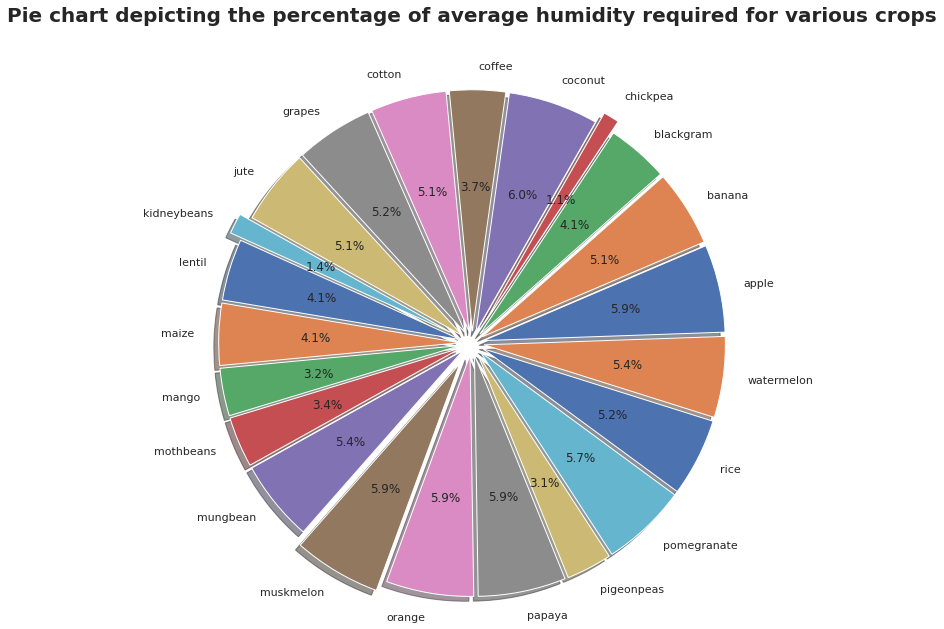

In [ ]:
crop= df1.pivot_table('humidity', index='label', aggfunc='mean')
x = crop.index.values
y = crop.values
y = y.reshape(22,)

fig, ax = plt.subplots(figsize=(10, 10))
explode = (0.05,0.05,0.05,0.1,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.05,0.05,0.05,0.05,0.05)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=2)
ax.axis('equal')  
plt.title('Pie chart depicting the percentage of average humidity required for various crops\n\n',fontweight='bold',fontsize=20)

plt.show()

**Inference:**
1. Mungbean requires an average humidity of 5.4%.
2. Chickpea and kidney beans require the least humidity on an average scale.
3. On an average, coconut needs high humidity to grow with 6%.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
crop_summary = pd.pivot_table(df1,index=['label'],aggfunc='mean')
crop_summary.head()
phosphorus = crop_summary.sort_values(by='P', ascending=False) 
fig = make_subplots(rows=1, cols=2)
top = {'y' : phosphorus['P'][0:10].sort_values().index,'x' : phosphorus['P'][0:10].sort_values()}
last = {'y' :  phosphorus['P'][-10:].index,'x' :  phosphorus['P'][-10:]}

fig.add_trace(go.Bar(top,name="Most phosphorus required", marker_color="green",orientation='h',text=top['x']), row=1, col=1)
fig.add_trace( go.Bar(last, name="Least phosphorus required", marker_color="red",orientation='h',text=last['x']), row=1, col=2)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",plot_bgcolor='white',font_size=12,font_color='black',height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Inference:**
1. Apple, grapes, banana are the top three crops which require the highest potassium.
2. Orange, coconut, watermelon requires the lowest potassium level.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=crop_summary.index, y=crop_summary['N'],name='Nitrogen',marker_color='aqua'))
fig.add_trace(go.Bar(x=crop_summary.index, y=crop_summary['P'],name='Phosphorous', marker_color='limegreen'))
fig.add_trace(go.Bar(x=crop_summary.index,y=crop_summary['K'],name='Potassium', marker_color='skyblue'))
fig.update_layout(title="N, P, K values comparision between crops", plot_bgcolor='white',barmode='group',xaxis_tickangle=-45)
fig.show()


**Inference:**
1. Grapes and apples are simmilar type requiring high potassium level and low nitrogen level.
2. Cotton requires high nitrogen level
3. Orange requires the lowest phosphorus level.


In [ ]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",plot_bgcolor='white',height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Inference:**
1. Rice requires the highest rainfall while muskmelon requires the lowest rainfall.
2. Chickpea requires lowest humidity.
3. Temperature seems to not majorly affect the growth of crops 
as far as it has value of 25 C on an average.

#Corelation Matrix

**Before Normalization**

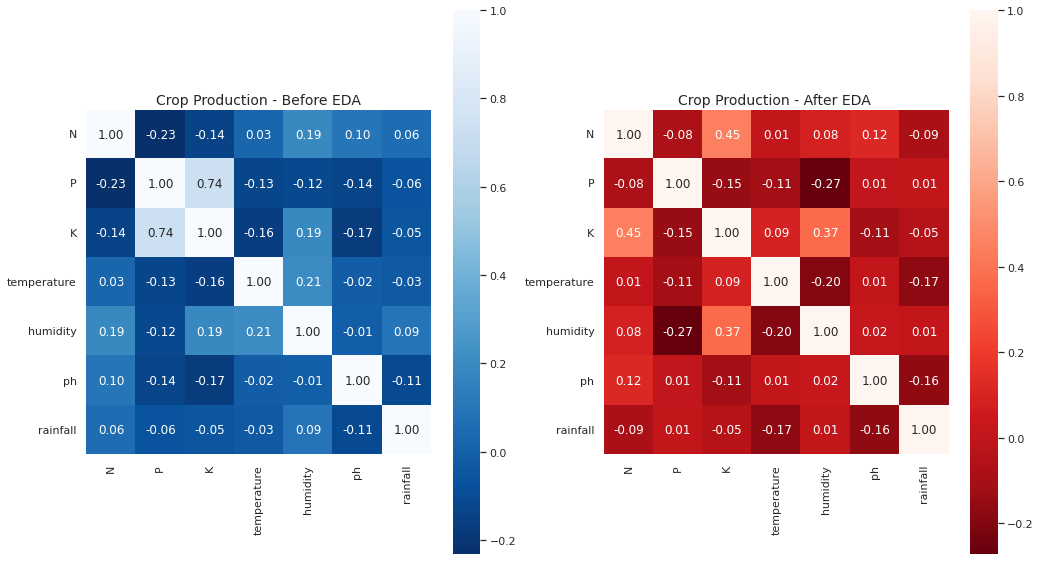

In [ ]:
fig = plt.figure(figsize=(17,10))
fig.add_subplot(121)
plt.title('Crop Production - Before EDA', fontsize=14)
sns.heatmap(df1.corr(), annot=True, fmt='.2f', square=True, cmap = 'Blues_r')
fig.add_subplot(122)
plt.title('Crop Production - After EDA ', fontsize=14)
sns.heatmap(features_norm.corr(), annot=True, fmt='.2f', square=True, cmap = 'Reds_r')
plt.show()

**Inference:**
1. Before EDA, only Potassium and Phosphorous are highly positively correlated.
2. After EDA, Potassium and Phosphorous are lowly correlated negatively which is a fact. Because, in science, both of the elements dont have a relationship which is exhibited after clearing the outliers.
3. After EDA, Nitrogen and potassium's correlation increased positively.

#Feature Selection

[0.13189081 0.16088123 0.182863   0.0904932  0.19896286 0.06819955
 0.16670935]


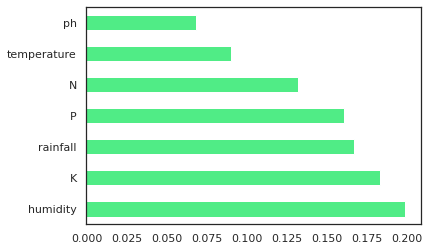

In [ ]:
X=features_norm
y=target
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh',color='#50EC86')
plt.show()

**Inference**
1. Humidity has the most influence on Crops.

# Splitting the dataset

In [ ]:
# Splitting the dataset into train and test (70 : 30 ratio)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_norm,target,test_size = 0.3,random_state =2)

In [ ]:
# Displaying the 4 segments of the dataset
Xtrain.head()

N         P     K  temperature  humidity        ph  rainfall
1494  0.635714  0.222222  0.90     0.571561  0.875900  0.482016  0.033165
1508  0.157143  0.477778  0.48     0.316489  0.880796  0.517956  0.659634
488   0.192857  0.733333  0.38     0.790822  0.255468  0.682858  0.988748
1050  0.764286  0.744444  0.80     0.626221  0.735024  0.311457  0.484818
1480  0.585714  0.166667  0.98     0.685359  0.856760  0.530176  0.008404

In [ ]:
Ytrain.head()

1494    15
1508     0
488     18
1050     1
1480    15
Name: label, dtype: int64

In [ ]:
Xtest.head()

N         P     K  temperature  humidity        ph  rainfall
2121  0.592857  0.177778  0.46     0.498012  0.432472  0.800011  0.488867
960   0.007143  0.244444  0.62     0.419481  0.904579  0.280626  0.577338
952   0.164286  0.000000  0.78     0.281498  0.917811  0.711432  0.594872
1958  0.828571  0.522222  0.28     0.367678  0.646311  0.405825  0.319170
681   0.042857  0.355556  0.24     0.623102  0.717858  0.594168  0.122124

In [ ]:
Ytest.head()

2121     5
960     19
952     19
1958     6
681     14
Name: label, dtype: int64

# KNN

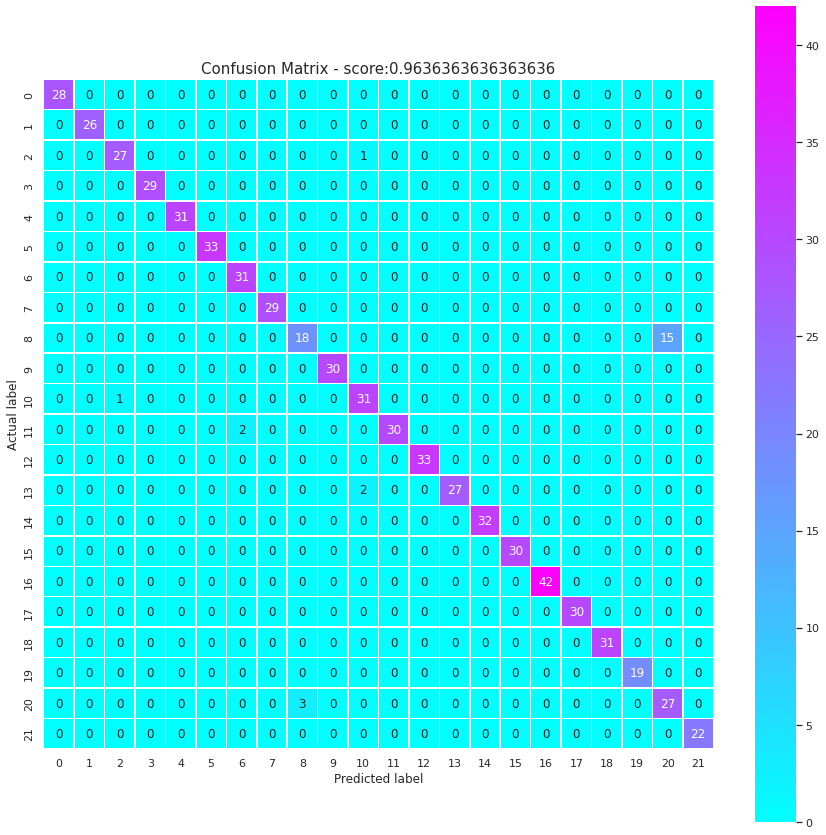

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.96      0.96      0.96        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       0.94      1.00      0.97        31
           7       1.00      1.00      1.00        29
           8       0.86      0.55      0.67        33
           9       1.00      1.00      1.00        30
          10       0.91      0.97      0.94        32
          11       1.00      0.94      0.97        32
          12       1.00      1.00      1.00        33
          13       1.00      0.93      0.96        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
          17       1.00    

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1) 
knn.fit(Xtrain, Ytrain)
pred = knn.predict(Xtest)
cm = confusion_matrix(Ytest, pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'cool');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(Ytest, pred))

Text(0, 0.5, 'Error Rate')

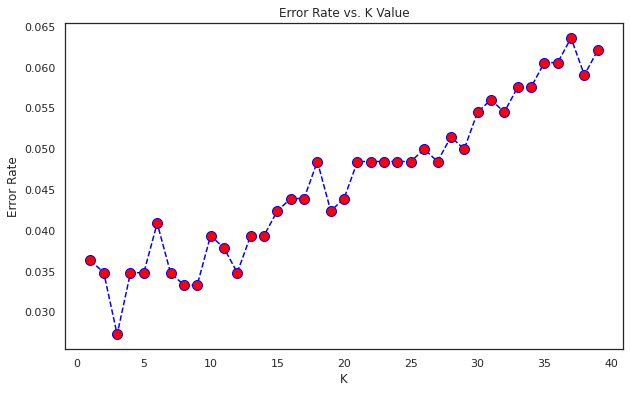

In [ ]:
error_rate = []
for i in range(1, 40):     
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(Xtrain, Ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != Ytest))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

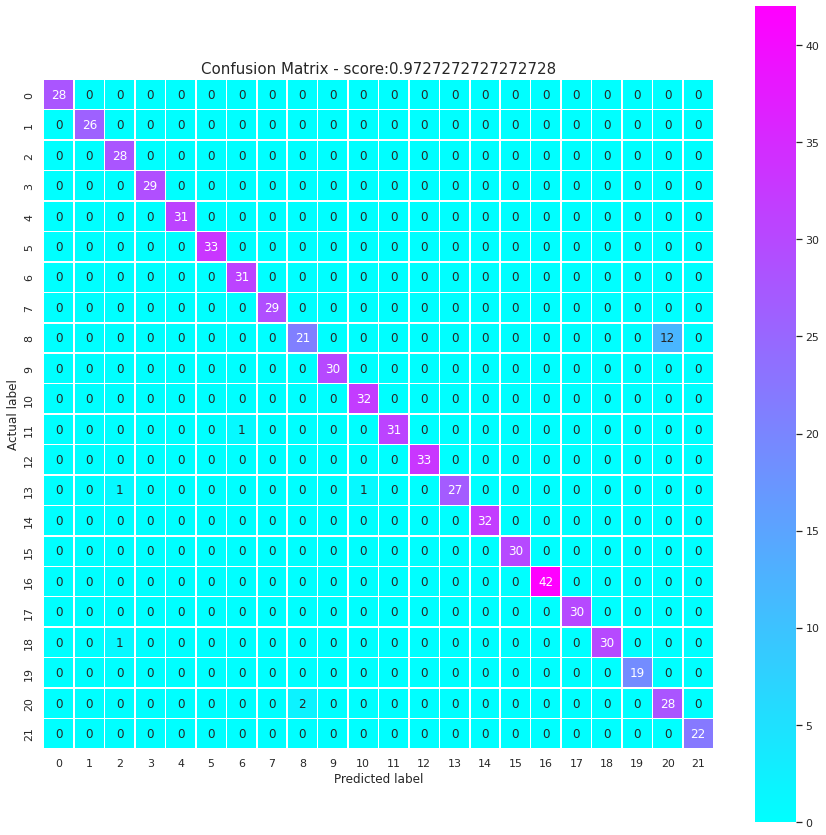

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.93      1.00      0.97        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       0.97      1.00      0.98        31
           7       1.00      1.00      1.00        29
           8       0.91      0.64      0.75        33
           9       1.00      1.00      1.00        30
          10       0.97      1.00      0.98        32
          11       1.00      0.97      0.98        32
          12       1.00      1.00      1.00        33
          13       1.00      0.93      0.96        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
          17       1.00    

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(Xtrain, Ytrain)
pred = knn.predict(Xtest)
cm = confusion_matrix(Ytest, pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'cool');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(classification_report(Ytest, pred))

# Decision Tree

Results Using Gini Index:


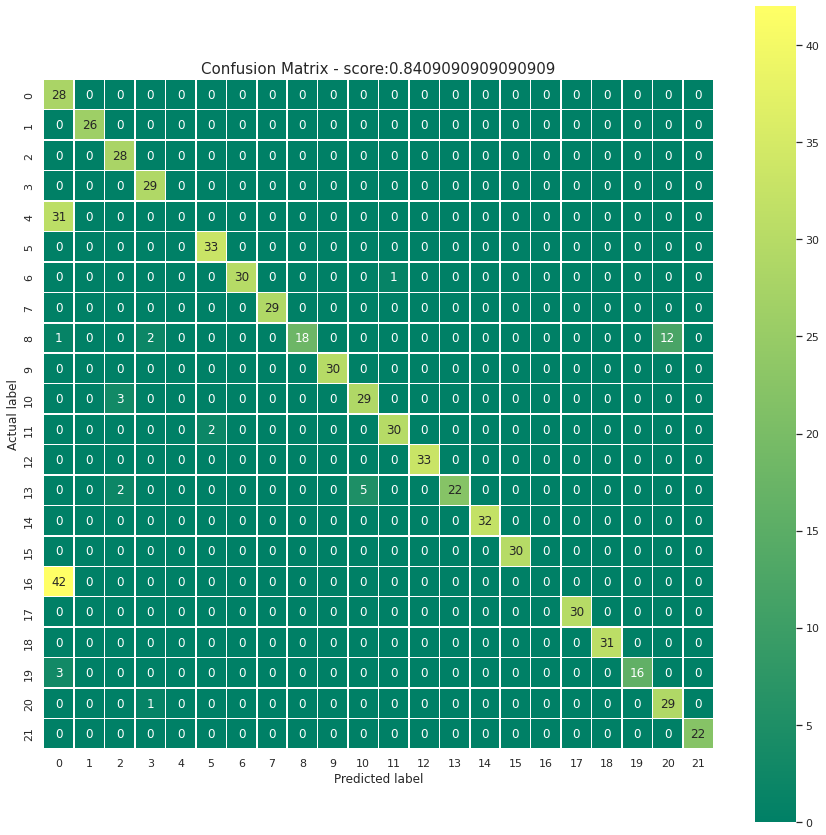

Accuracy : 
 84.0909090909091
Report : 
               precision    recall  f1-score   support

           0       0.27      1.00      0.42        28
           1       1.00      1.00      1.00        26
           2       0.85      1.00      0.92        28
           3       0.91      1.00      0.95        29
           4       0.00      0.00      0.00        31
           5       0.94      1.00      0.97        33
           6       1.00      0.97      0.98        31
           7       1.00      1.00      1.00        29
           8       1.00      0.55      0.71        33
           9       1.00      1.00      1.00        30
          10       0.85      0.91      0.88        32
          11       0.97      0.94      0.95        32
          12       1.00      1.00      1.00        33
          13       1.00      0.76      0.86        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       0.00      0.00      0

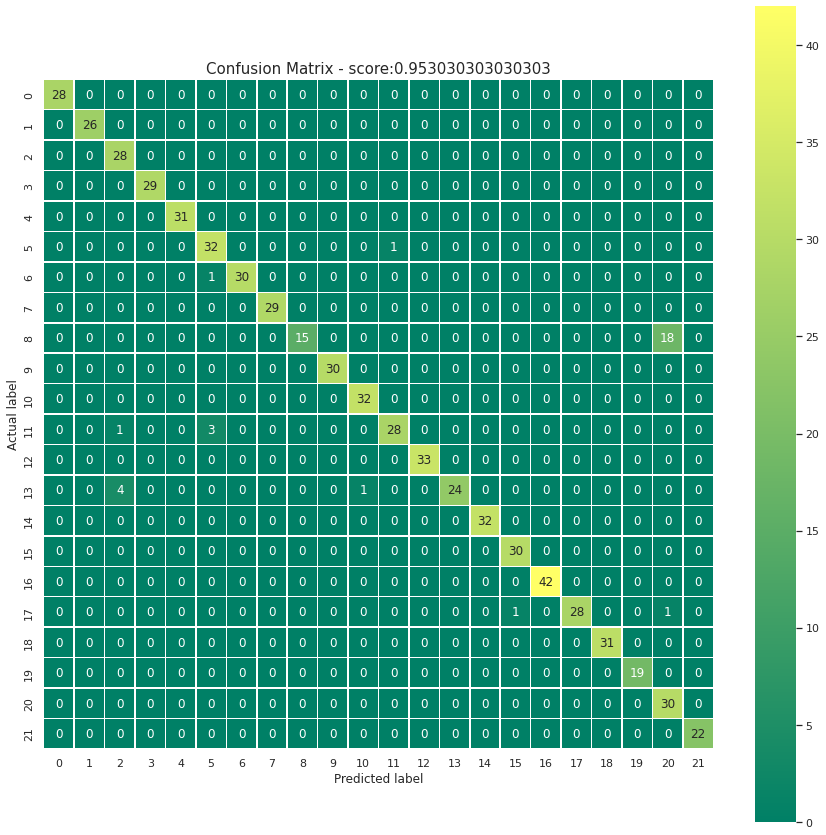

Accuracy : 
 95.3030303030303
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.85      1.00      0.92        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       0.89      0.97      0.93        33
           6       1.00      0.97      0.98        31
           7       1.00      1.00      1.00        29
           8       1.00      0.45      0.62        33
           9       1.00      1.00      1.00        30
          10       0.97      1.00      0.98        32
          11       0.97      0.88      0.92        32
          12       1.00      1.00      1.00        33
          13       1.00      0.83      0.91        29
          14       1.00      1.00      1.00        32
          15       0.97      1.00      0.98        30
          16       1.00      1.00      1

In [ ]:
x = ['giniIndex','Entrophy']
y=[]
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=7, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 7, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    #print("Predicted values:")
    #print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15,15))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'summer');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
    plt.title(all_sample_title, size = 15);
    plt.show()
      
    print ("Accuracy : \n",
    accuracy_score(y_test,y_pred)*100)
    y.append(accuracy_score(y_test,y_pred))
      
    print("Report : \n",
    classification_report(y_test, y_pred,zero_division=0))
  
# Driver code
def main():
    clf_gini = train_using_gini(Xtrain, Xtest, Ytrain)
    clf_entropy = tarin_using_entropy(Xtrain, Xtest, Ytrain)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(Xtest, clf_gini)
    cal_accuracy(Ytest, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(Xtest, clf_entropy)
    cal_accuracy(Ytest, y_pred_entropy)
   
      
      
# Calling main function
if __name__=="__main__":
    main()

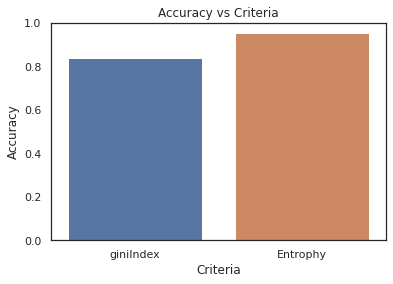

In [ ]:
sns.barplot(x=x,y=y)
plt.title('Accuracy vs Criteria')
plt.xlabel('Criteria')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
max_accuracy = max(y)
i = y.index(max_accuracy)
max_criteria = x[i]
print('Highest accuracy is for {0} which is {1}'.format(max_criteria, max_accuracy))

Highest accuracy is for Entrophy which is 0.953030303030303


# SVM

Kernel :  linear

0.9484848484848485



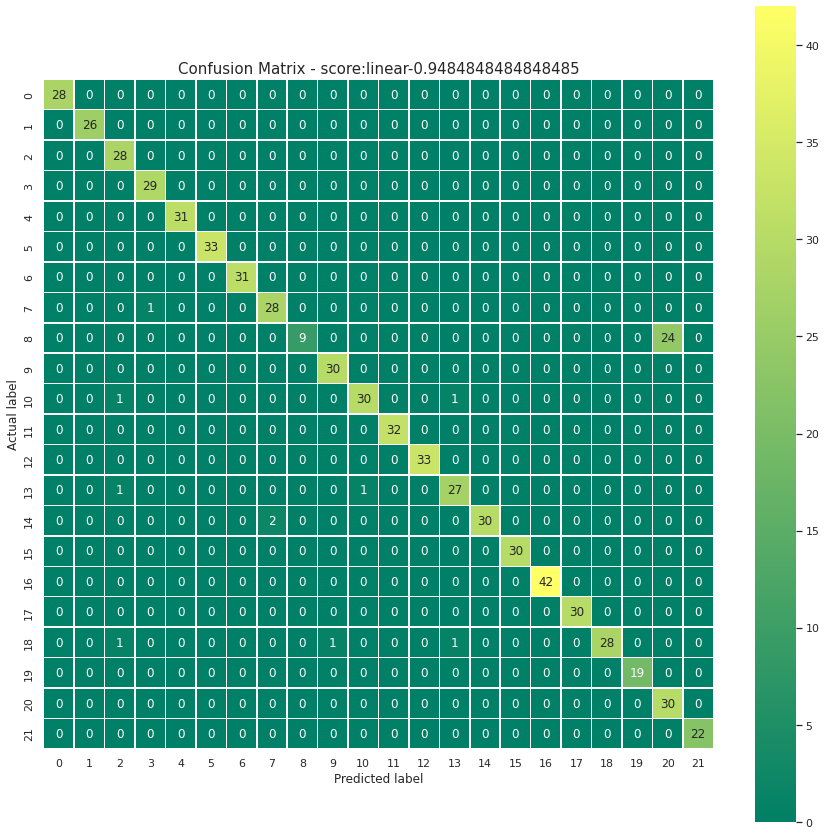

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.90      1.00      0.95        28
           3       0.97      1.00      0.98        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       0.93      0.97      0.95        29
           8       1.00      0.27      0.43        33
           9       0.97      1.00      0.98        30
          10       0.97      0.94      0.95        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       0.93      0.93      0.93        29
          14       1.00      0.94      0.97        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

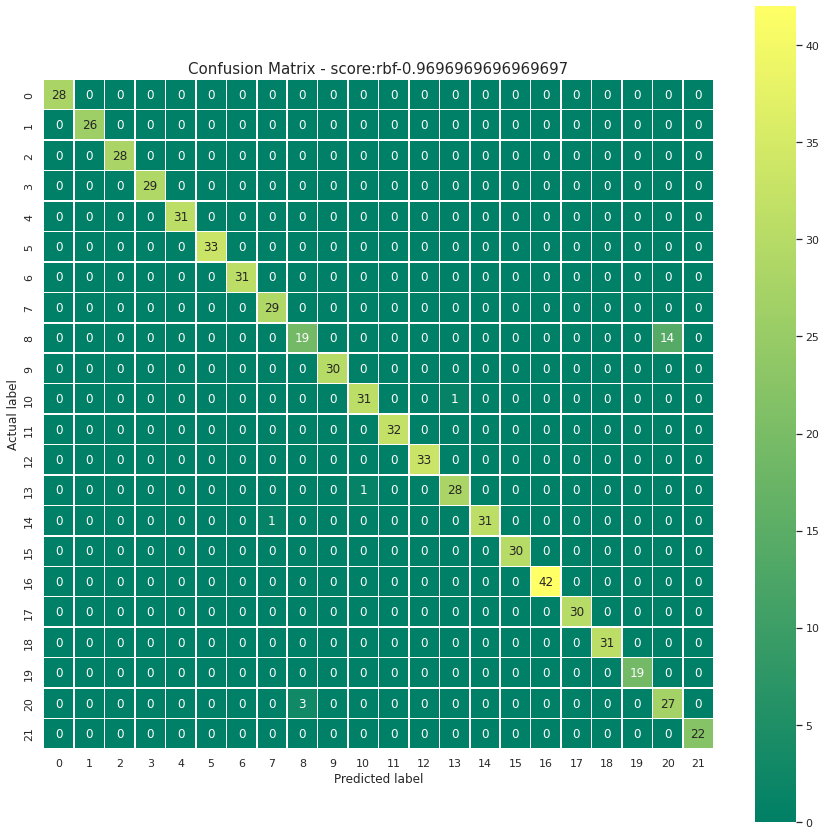

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       0.97      1.00      0.98        29
           8       0.86      0.58      0.69        33
           9       1.00      1.00      1.00        30
          10       0.97      0.97      0.97        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       0.97      0.97      0.97        29
          14       1.00      0.97      0.98        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

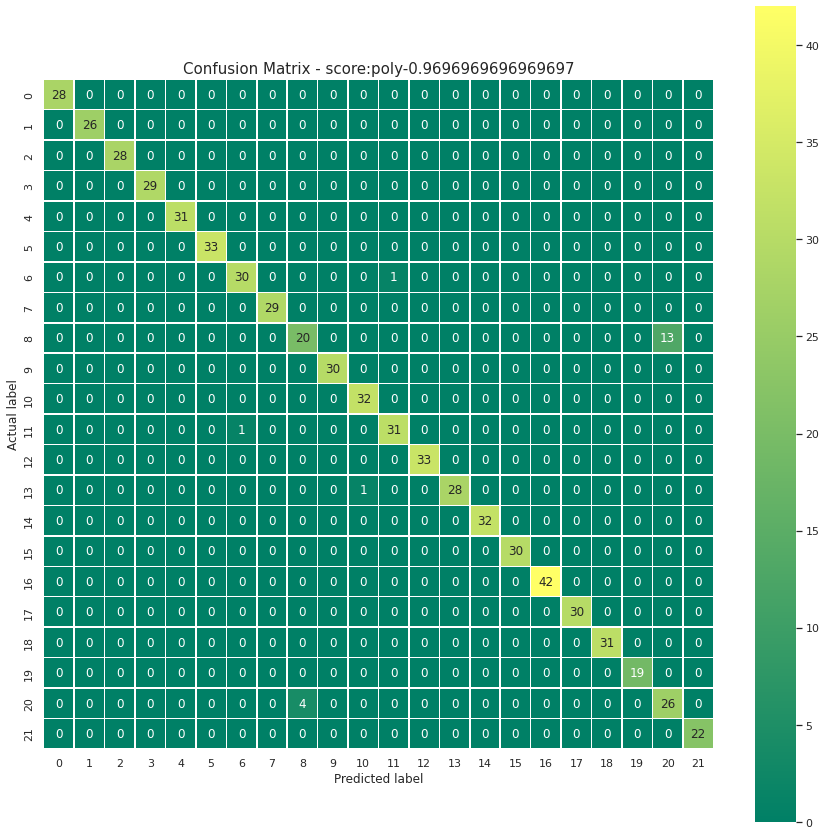

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       0.97      0.97      0.97        31
           7       1.00      1.00      1.00        29
           8       0.83      0.61      0.70        33
           9       1.00      1.00      1.00        30
          10       0.97      1.00      0.98        32
          11       0.97      0.97      0.97        32
          12       1.00      1.00      1.00        33
          13       1.00      0.97      0.98        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

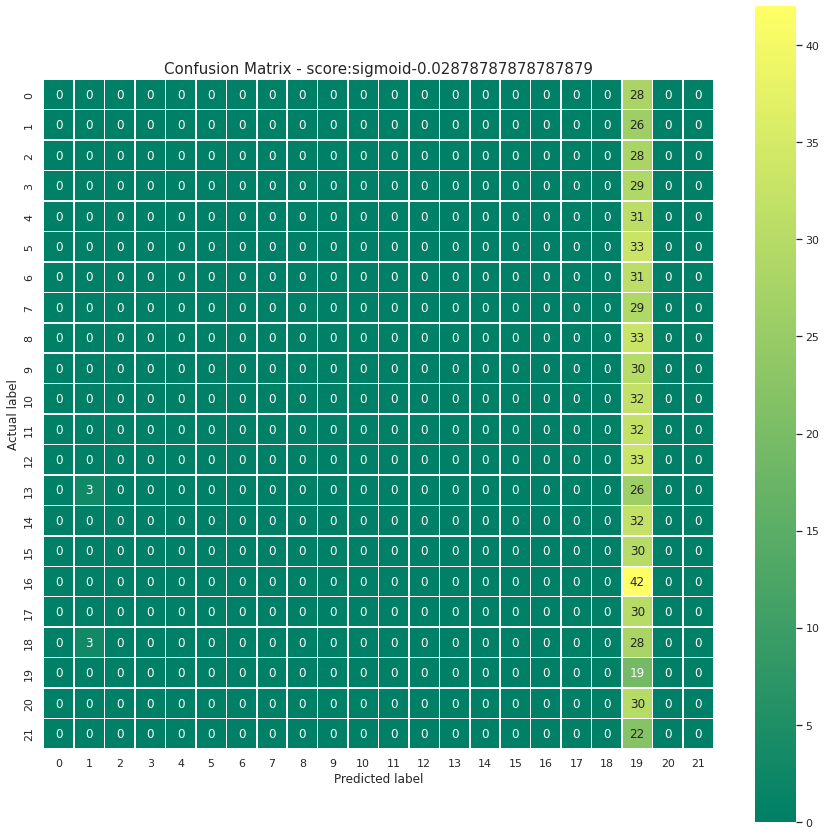

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        31
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        32
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        30
          16       0.00      0.00      0.00        42
   

In [ ]:
x = []
y = []
kernels = ['linear','rbf','poly','sigmoid']
max_test_score = 0
max_kernel = 'linear'
for kernel in kernels:
  print('Kernel : ',kernel)
  print()
  x.append(kernel)
  svc_model = SVC(kernel=kernel)
  svc_model.fit(Xtrain, Ytrain)
    
  prediction = svc_model .predict(Xtest)
  #print(svc_model.score(Xtrain, Ytrain))
  test_score = svc_model.score(Xtest, Ytest)
  print(test_score)
  y.append(test_score)
  if(test_score>max_test_score):
    max_test_score = test_score
    max_kernel = kernel
  print()
  cm = confusion_matrix(Ytest, prediction)
  plt.figure(figsize=(15,15))
  sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'summer');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Confusion Matrix - score:'+kernel+'-'+str(accuracy_score(Ytest,prediction))
  plt.title(all_sample_title, size = 15);
  plt.show()
  print("Classification Report:\n",classification_report(Ytest, prediction,zero_division=0))

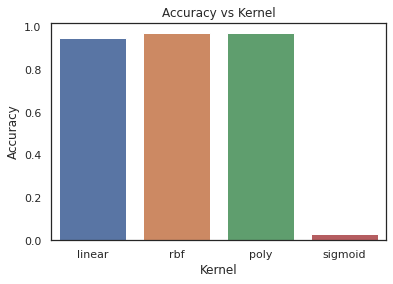

In [ ]:
sns.barplot(x = x,y=y)
plt.title('Accuracy vs Kernel')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print('Highest accuracy is for {0} which is {1}'.format(max_kernel, max_test_score))

Highest accuracy is for rbf which is 0.9696969696969697


# Random Forest

In [ ]:
x = []
y = []
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 20)]
for est in n_estimators:
  clf = RandomForestClassifier(n_estimators = est,random_state=1) 
  clf.fit(Xtrain, Ytrain)
  Y_pred_rf = clf.predict(Xtest)
  x.append(est)
  y.append(accuracy_score(Ytest, Y_pred_rf))

Text(0, 0.5, 'Accuracy')

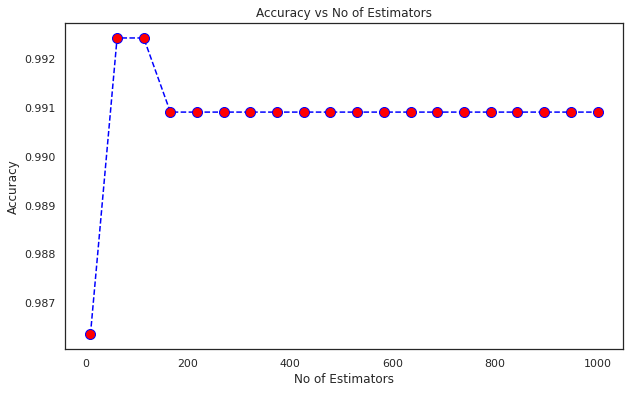

In [ ]:
plt.figure(figsize =(10, 6))
plt.plot(x,y, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Accuracy vs No of Estimators')
plt.xlabel('No of Estimators')
plt.ylabel('Accuracy')

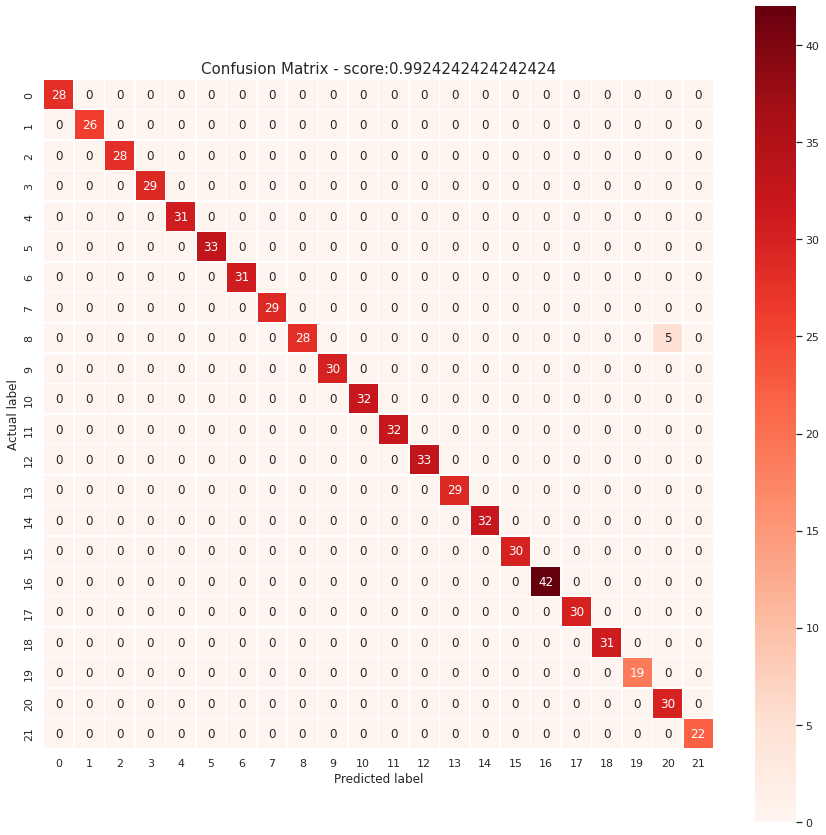

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       1.00      0.85      0.92        33
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,random_state=1) 
clf.fit(Xtrain, Ytrain)
Y_pred_rf = clf.predict(Xtest)
cm = confusion_matrix(Ytest, Y_pred_rf)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Y_pred_rf))
plt.title(all_sample_title, size = 15);
plt.show()
print("Classification Report:\n",classification_report(Ytest, Y_pred_rf))
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Y_pred_rf))

# Gaussian Naive Bayes

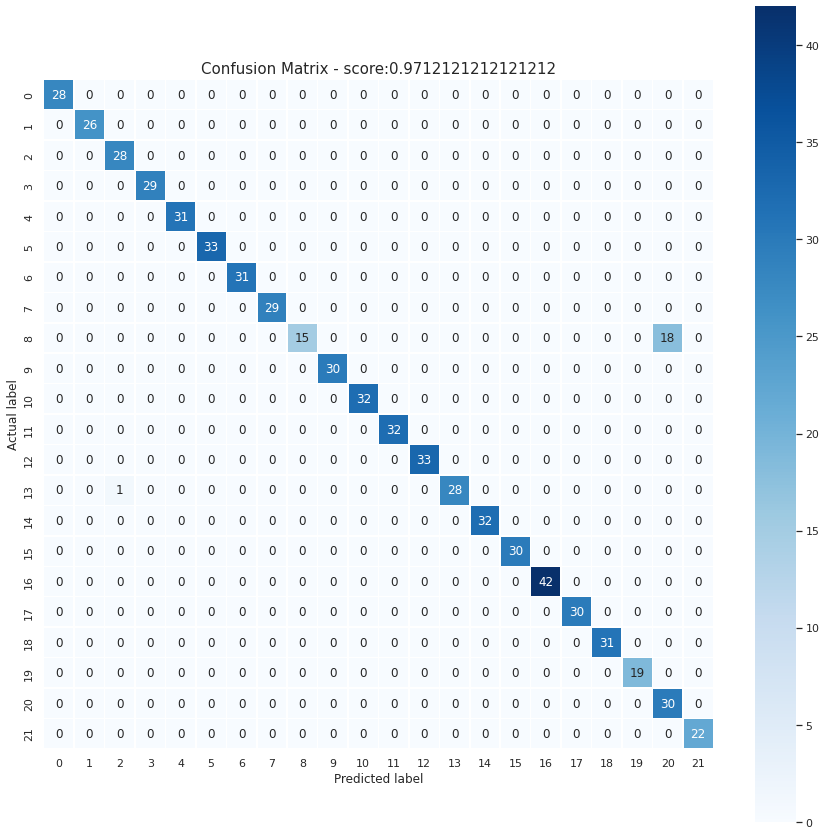

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       1.00      0.45      0.62        33
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       1.00      0.97      0.98        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

In [ ]:
gnb = GaussianNB()
gnb.fit(Xtrain, Ytrain)
Y_pred = gnb.predict(Xtest)
cm = confusion_matrix(Ytest, Y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print("Classification Report:\n",classification_report(Ytest, Y_pred))
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Y_pred))

# XGBoost

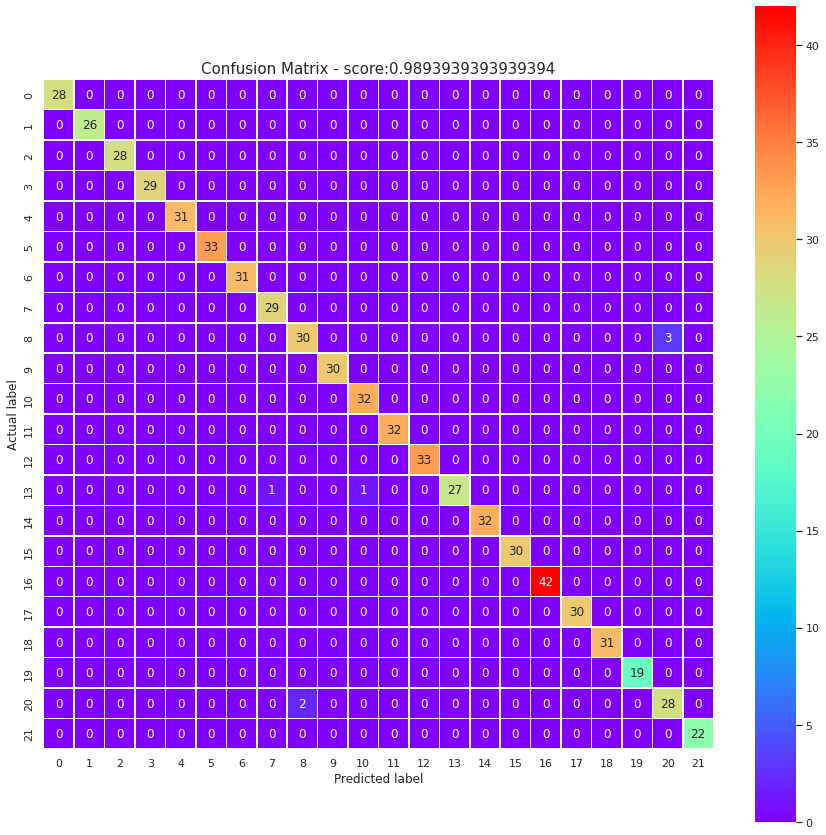

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       0.97      1.00      0.98        29
           8       0.94      0.91      0.92        33
           9       1.00      1.00      1.00        30
          10       0.97      1.00      0.98        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       1.00      0.93      0.96        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

In [ ]:
my_model = xgb.XGBClassifier()
my_model.fit(Xtrain, Ytrain)
Ypred = my_model.predict(Xtest)
cm = confusion_matrix(Ytest, Ypred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'rainbow');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Ypred))
plt.title(all_sample_title, size = 15);
plt.show()
print("Classification Report:\n",classification_report(Ytest, Ypred))
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Ypred))

# ANN

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape = (7,), activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "softmax"))
model.compile(Adam(learning_rate = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(Xtrain, Ytrain, epochs=150, batch_size=10)

Epoch 1/150
154/154 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0481
Epoch 2/150
154/154 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0481
Epoch 3/150
154/154 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0481
Epoch 4/150
154/154 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0481
Epoch 5/150
154/154 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0481
Epoch 6/150
154/154 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0481
Epoch 7/150
154/154 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0481
Epoch 8/150
154/154 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0481
Epoch 9/150
154/154 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0481
Epoch 10/150
154/154 [==============================] -

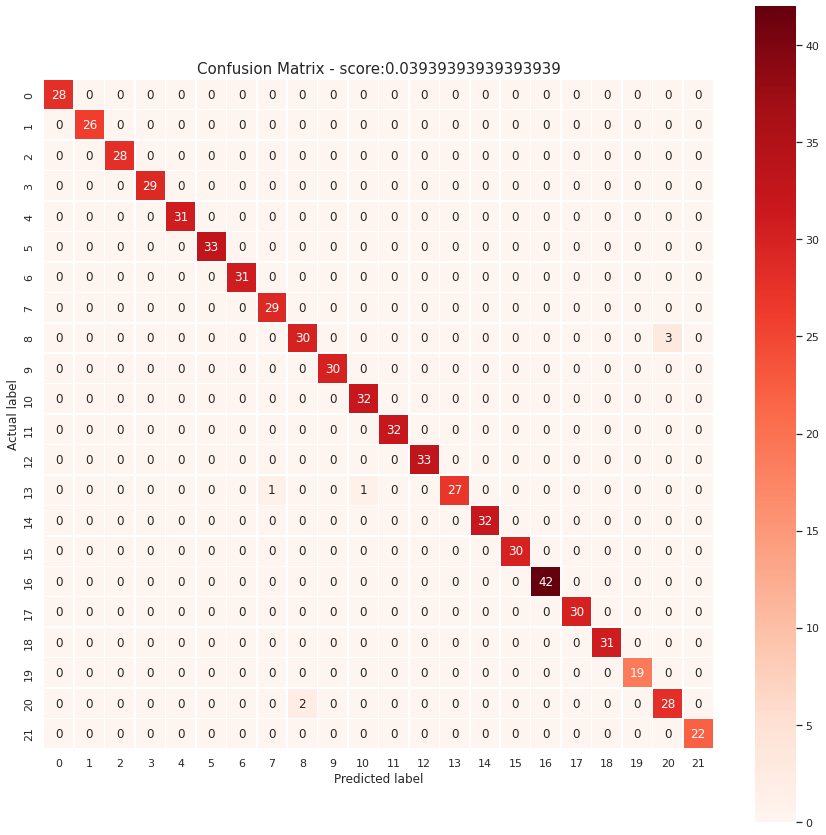

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.04      1.00      0.08        26
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        31
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        30
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        32
          12       0.00      0.00      0.00        33
          13       0.00      0.00      0.00        29
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        30
          16       0.00      0.00      0.00        42
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
Ypred_class = model.predict(Xtest)
cm = confusion_matrix(Ytest, Ypred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Ypred_class))
plt.title(all_sample_title, size = 15);
plt.show()
print("Classification Report:\n",classification_report(Ytest, Ypred_class))
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Ypred_class))

# Logistic Regression

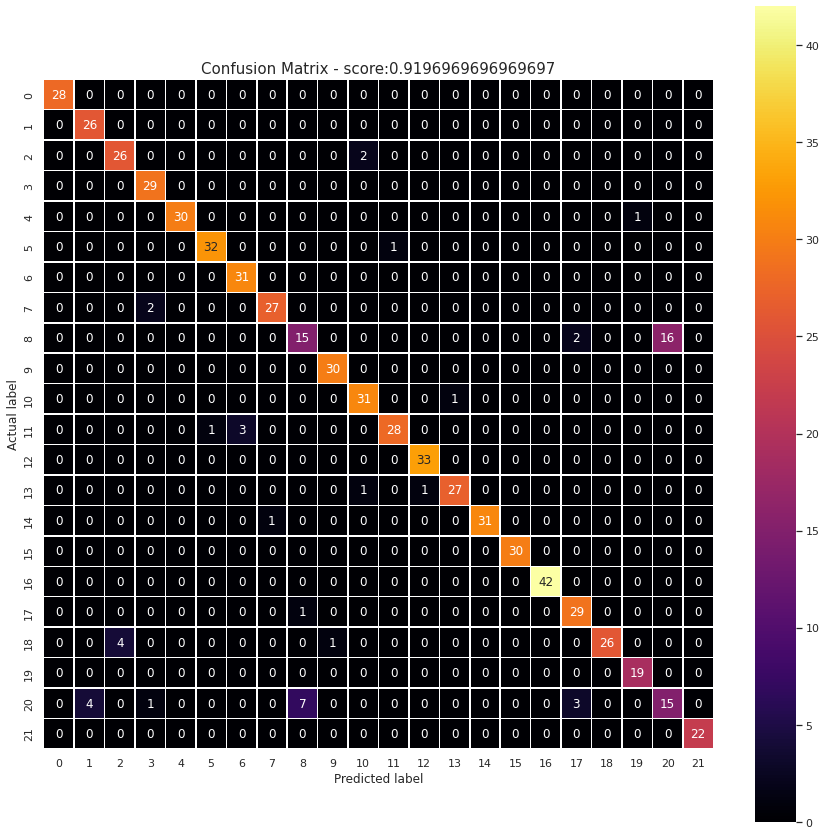

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.87      1.00      0.93        26
           2       0.87      0.93      0.90        28
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        31
           5       0.97      0.97      0.97        33
           6       0.91      1.00      0.95        31
           7       0.96      0.93      0.95        29
           8       0.65      0.45      0.54        33
           9       0.97      1.00      0.98        30
          10       0.91      0.97      0.94        32
          11       0.97      0.88      0.92        32
          12       0.97      1.00      0.99        33
          13       0.96      0.93      0.95        29
          14       1.00      0.97      0.98        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

In [ ]:
reg = linear_model.LogisticRegression( multi_class='multinomial', solver='sag',random_state=57)
reg.fit(Xtrain, Ytrain)
Ypred = reg.predict(Xtest)
cm = confusion_matrix(Ytest, Ypred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'inferno');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Ypred))
plt.title(all_sample_title, size = 15);
plt.show()
print("Classification Report:\n",classification_report(Ytest, Ypred))
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Ypred))

# Gradient Boost

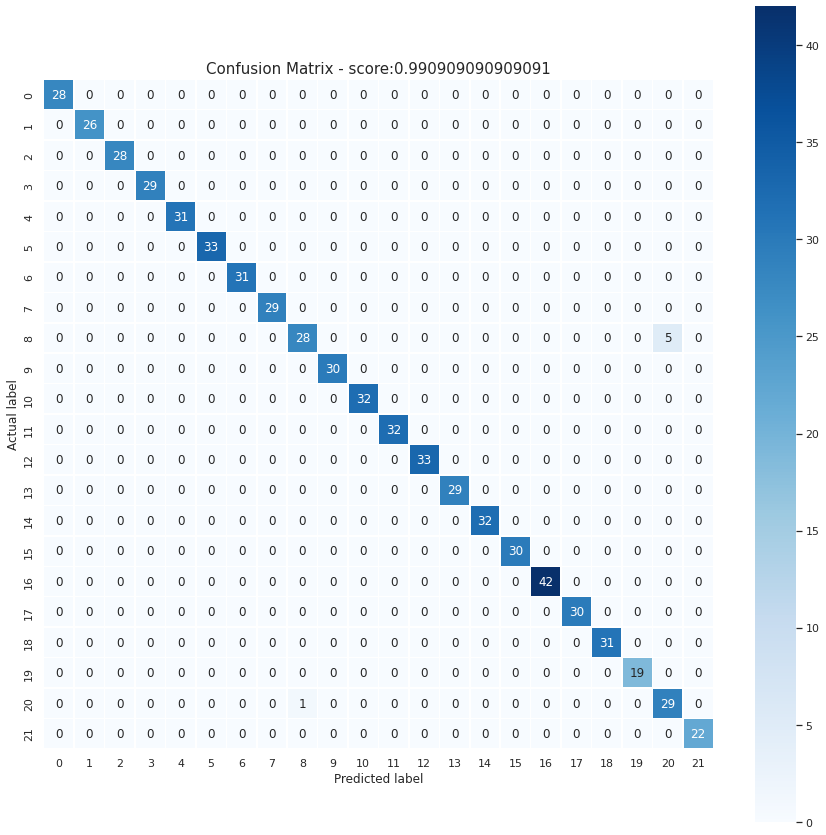

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       0.97      0.85      0.90        33
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(learning_rate=0.07, min_samples_split=700,min_samples_leaf=30,max_depth=8,max_features='sqrt')
gb_clf.fit(Xtrain, Ytrain)
Ypred = gb_clf.predict(Xtest)
cm = confusion_matrix(Ytest, Ypred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Ypred))
plt.title(all_sample_title, size = 15);
plt.show()
print("Classification Report:\n",classification_report(Ytest, Ypred))
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Ypred))

# AdaBoost

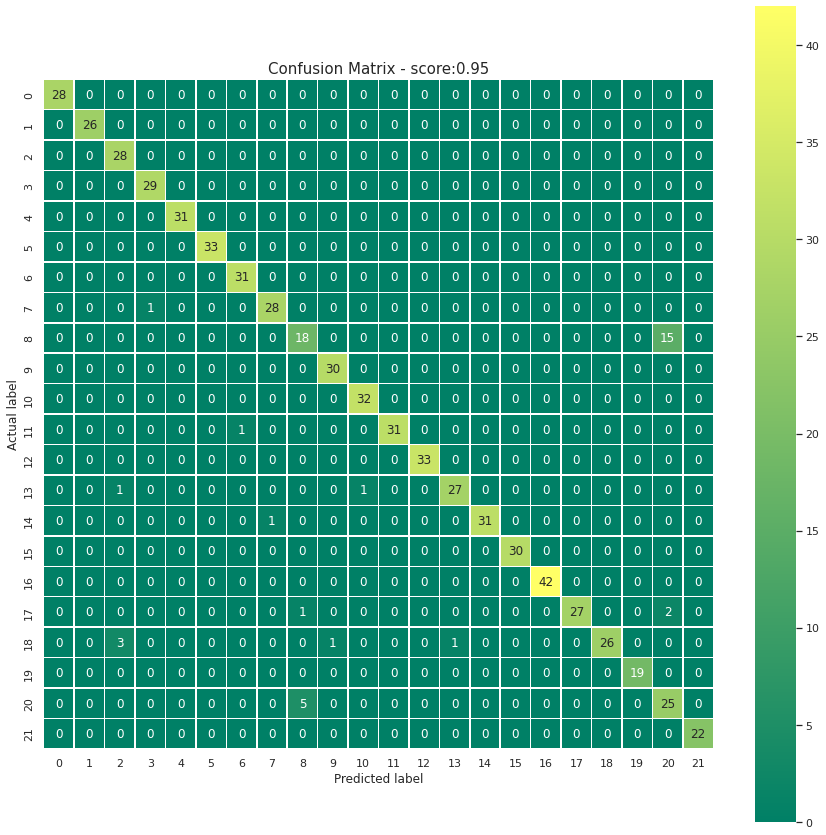

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.88      1.00      0.93        28
           3       0.97      1.00      0.98        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       0.97      1.00      0.98        31
           7       0.97      0.97      0.97        29
           8       0.75      0.55      0.63        33
           9       0.97      1.00      0.98        30
          10       0.97      1.00      0.98        32
          11       1.00      0.97      0.98        32
          12       1.00      1.00      1.00        33
          13       0.96      0.93      0.95        29
          14       1.00      0.97      0.98        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

In [ ]:
svc=SVC(probability=True, kernel='rbf')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=0.2)
model = abc.fit(Xtrain, Ytrain)
Ypred = model.predict(Xtest)
cm = confusion_matrix(Ytest, Ypred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'summer');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Ypred))
plt.title(all_sample_title, size = 15);
plt.show()

print("Classification Report:\n",classification_report(Ytest, Ypred))
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Ypred))

# Ensemble model

## Max Voting

In [ ]:
model_1 = RandomForestClassifier()
model_2 = xgb.XGBClassifier()
model_3 = GradientBoostingClassifier()
final_model = VotingClassifier(
    estimators=[('rf', model_1), ('xgb', model_2), ('gb', model_3)], voting='hard')
final_model.fit(Xtrain, Ytrain)
Ypred = final_model.predict(Xtest)
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Ypred))

ACCURACY OF THE MODEL:  0.9924242424242424


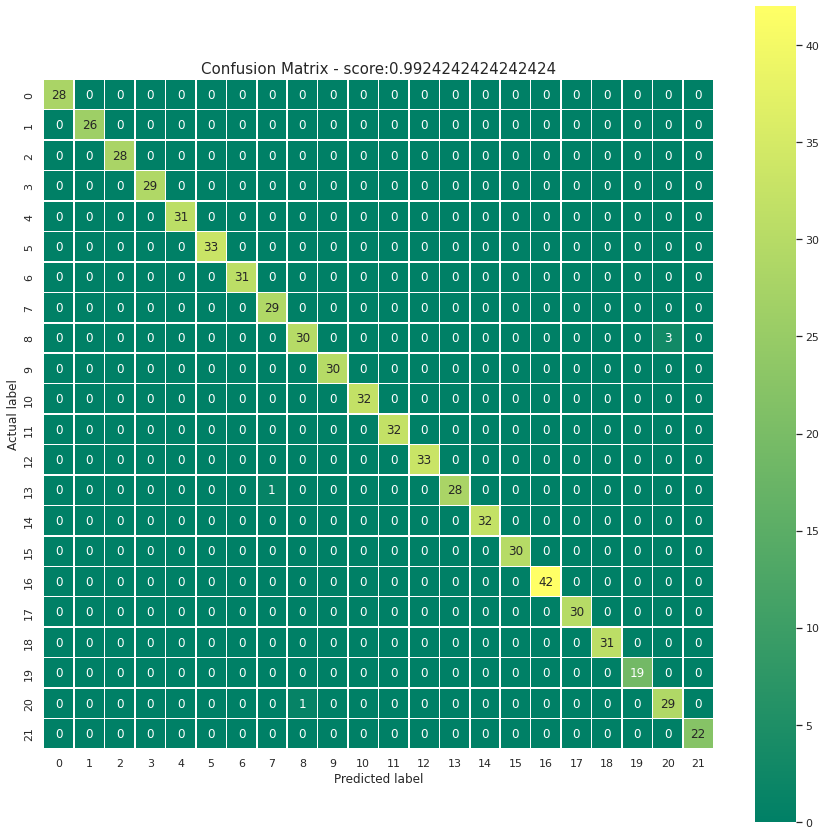

In [ ]:
cm = confusion_matrix(Ytest, Ypred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'summer');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Ypred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print("Classification Report:\n",classification_report(Ytest, Ypred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       0.97      1.00      0.98        29
           8       0.97      0.91      0.94        33
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       1.00      0.97      0.98        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

## Stacking

In [ ]:
model_1 = RandomForestClassifier()
model_2 = xgb.XGBClassifier()
model_3 = GradientBoostingClassifier()
all_models = [model_1, model_2, model_3]
final_model = StackingCVClassifier(classifiers = all_models,
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))
 
final_model.fit(Xtrain.values, Ytrain.values)
Ypred = final_model.predict(Xtest.values)
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Ypred))

ACCURACY OF THE MODEL:  0.990909090909091


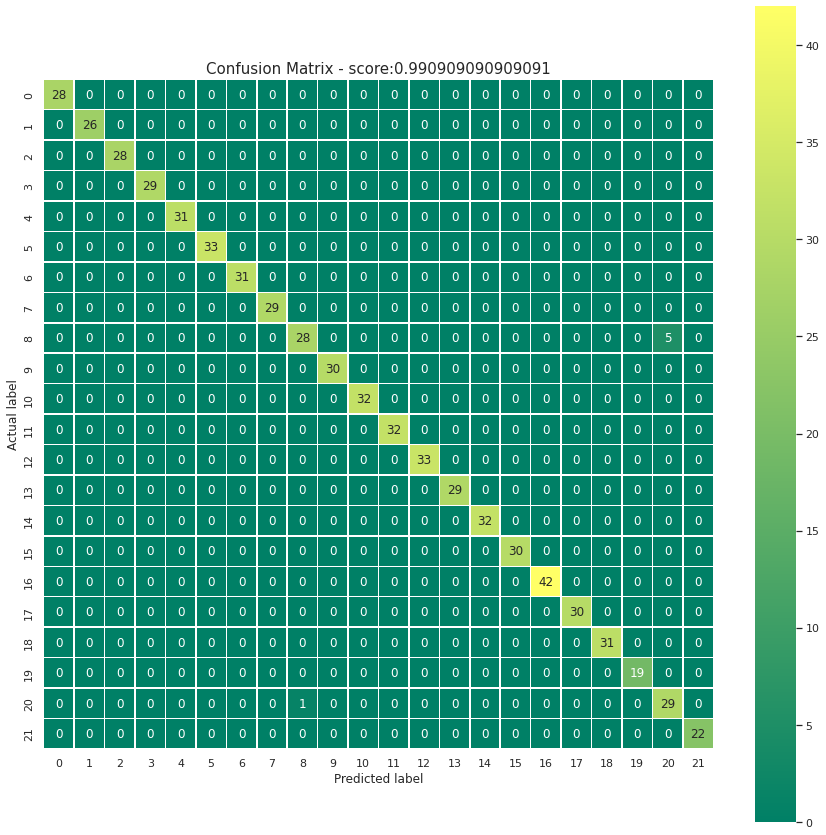

In [ ]:
cm = confusion_matrix(Ytest, Ypred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'summer');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Ypred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print("Classification Report:\n",classification_report(Ytest, Ypred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       0.97      0.85      0.90        33
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

## Bagging

In [ ]:
cart = DecisionTreeClassifier()
num_trees = 500
bc = BaggingClassifier(base_estimator=cart, n_estimators=num_trees,random_state=10) #10
model = bc.fit(Xtrain, Ytrain)
Ypred = model.predict(Xtest)
print("ACCURACY OF THE MODEL: ", accuracy_score(Ytest, Ypred))

ACCURACY OF THE MODEL:  0.990909090909091


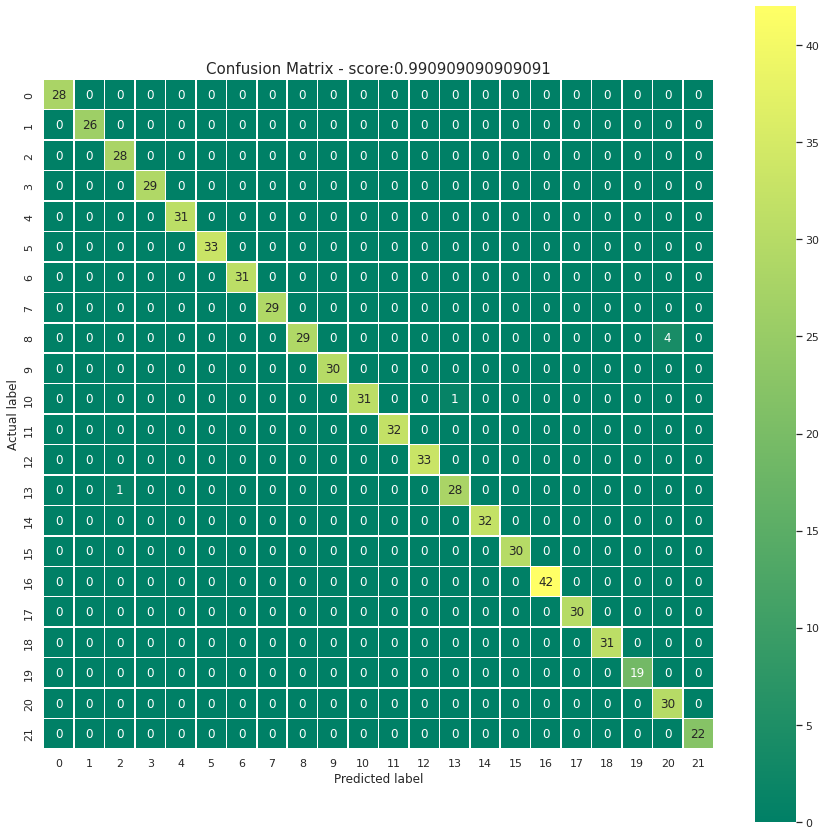

In [ ]:
cm = confusion_matrix(Ytest, Ypred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'summer');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,Ypred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print("Classification Report:\n",classification_report(Ytest, Ypred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       1.00      0.88      0.94        33
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       0.97      0.97      0.97        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
   

#LightGBM

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type='goss',learning_rate=0.2,random_state=55)
model.fit(Xtrain, Ytrain)
y_pred=model.predict(Xtest)

In [ ]:
accuracy=accuracy_score(y_pred, Ytest)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Ytest, y_pred)))

LightGBM Model accuracy score: 0.9924


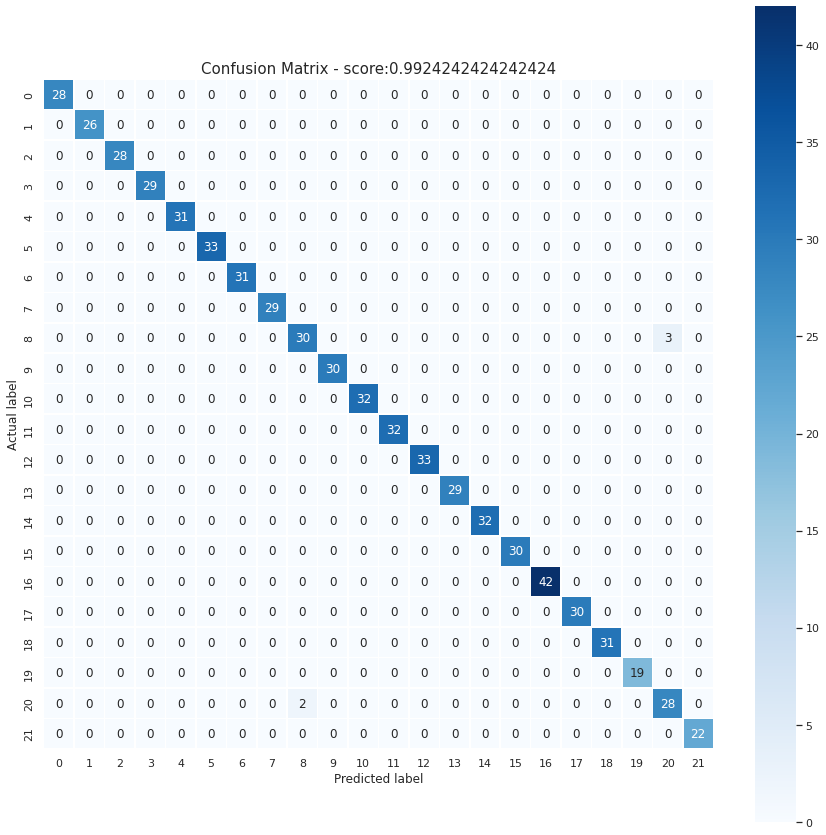

In [ ]:
cm = confusion_matrix(Ytest, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       0.94      0.91      0.92        33
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        32
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        42
          17       1.00    

#K-Means Clustering

In [ ]:
z = df1.drop(['label'],axis=1)
z = df1.loc[:,z.columns].values
x_df = pd.DataFrame(z)
x_df.head()

0     1     2          3          4         5           6
0  90.0  42.0  43.0  20.879744  82.002744  6.502985  202.935536
1  85.0  58.0  41.0  21.770462  80.319644  7.038096  226.655537
2  60.0  55.0  44.0  23.004459  82.320763  7.840207  263.964248
3  74.0  35.0  40.0  26.491096  80.158363  6.980401  242.864034
4  78.0  42.0  42.0  20.130175  81.604873  7.628473  262.717340

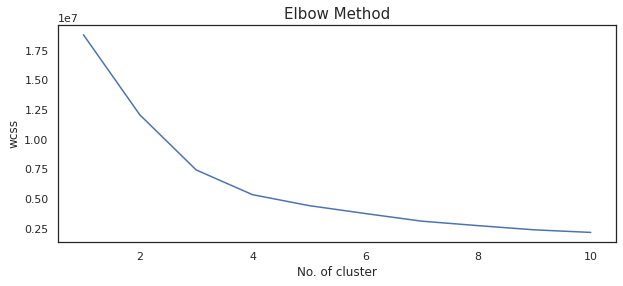

In [ ]:
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10,4)
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters =i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(z)
    wcss.append(km.inertia_)
    
#plot the results
plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize= 15)
plt.xlabel('No. of cluster')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters =4, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means= km.fit_predict(z)

a = df1['label']
y_means = pd.DataFrame(y_means)
w = pd.concat([y_means, a], axis=1)
w =w.rename(columns= {0:'cluster'})

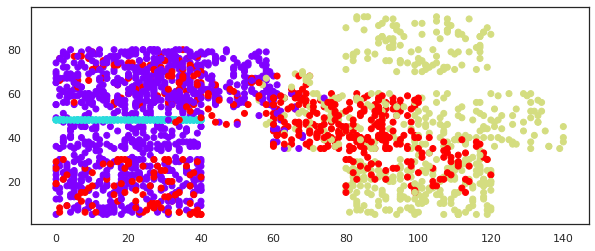

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = y_means 
plt.scatter(data_with_clusters['N'],data_with_clusters['P'],c=data_with_clusters['Clusters'],cmap='rainbow')

**Soft clustering**

In [ ]:
for i in range(0,4): #for 4 clusters 0,1,2,3
    print('Crops is cluster', i, w[w['cluster']==i]['label'].unique())
    print('---------------------------------------------------------------------------------------')

Crops is cluster 0 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------------------------------
Crops is cluster 1 ['grapes' 'apple']
---------------------------------------------------------------------------------------
Crops is cluster 2 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------------------------------
Crops is cluster 3 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------------------------------


**Hard Clustering**

In [ ]:
for i in range(0,4):
    counts=w[w['cluster']==i]['label'].value_counts()
    d = w.loc[w['label'].isin(counts.index[counts>=50])]
    d=d['label'].value_counts()
    print('Crops in Cluster', i,':', list(d.index))
    print('--------------------------------------------------------------------------------')

Crops in Cluster 0 : ['mango', 'blackgram', 'mungbean', 'lentil', 'chickpea', 'mothbeans', 'orange', 'kidneybeans', 'pomegranate']
--------------------------------------------------------------------------------
Crops in Cluster 1 : ['apple', 'grapes']
--------------------------------------------------------------------------------
Crops in Cluster 2 : ['banana', 'maize', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------------------------------------
Crops in Cluster 3 : ['coffee', 'pigeonpeas', 'papaya', 'jute', 'rice', 'coconut']
--------------------------------------------------------------------------------


In [ ]:
clusters = []
inertia_vals = []
for k in range(1, 10, 1):
    model = KMeans(n_clusters=k, random_state=7, n_jobs=10)
    model.fit(z)
# append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)
from sklearn.metrics import silhouette_score
for i in range(1,5,1):
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(z, clusters[i].predict(z)))

---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)
Silhouette score: 0.5451227886773357
---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)
Silhouette score: 0.4222256415004365
---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)
Silhouette score: 0.40078616497807307
---------------------------------------
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=7,

#Recommender

The appropriate crop to be cultivated: Rice



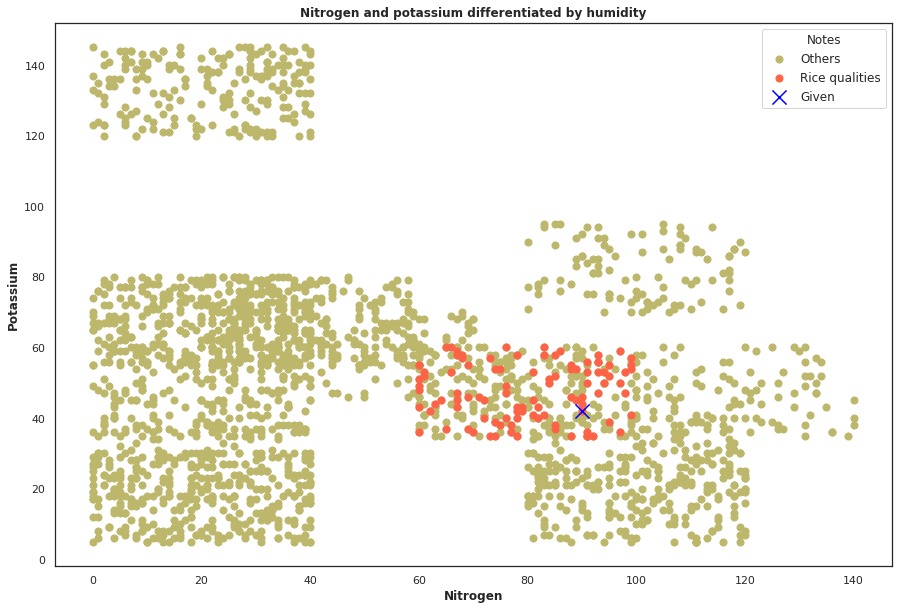

In [ ]:
'''print("Enter the Nitrogen value of your soil:")
N=int(input())
print("Enter the Phosphorus value of your soil:")
P=int(input())
print("Enter the Potassium value of your soil:")
K=int(input())
print("Enter the temperature value of your soil:")
temperature=int(input())
print("Enter the humidity value of your soil:")
humidity=int(input())
print("Enter the PH value of your soil:")
ph=int(input())
print("Enter the Rainfall value of your soil:")
rainfall=int(input())
'''
df2=features.values.copy()
N = 90
P = 42
K = 43
temperature = 20.82312
humidity = 82.00284
ph = 6.50232
rainfall = 91

sample = [N, P, K, temperature, humidity, ph, rainfall]
single_sample = np.array(sample).reshape(1,-1)
new=np.append(df2,single_sample,axis=0)
recommend=scaler.fit_transform(new)
pred = clf.predict(recommend[-1,:].reshape(1,-1))
value=pred.item()
for k,v in le_name_mapping.items():
  if value==v:
    key=k
    print("The appropriate crop to be cultivated:"+" "+k.title())
    print()
    break
fig = plt.figure(figsize=(15,10))
sns.set_style("white")
dataset=df1.loc[df1.label==key]
plt.scatter(x=df1.N,y=df1.P,s = 50, c = 'darkkhaki', label = 'Others')
plt.scatter(x=dataset.N,y=dataset.P,s = 50, c = 'tomato', label = 'Rice qualities')
plt.scatter(x=N,y=P,s = 200, c = 'blue', label = 'Given',marker="x")
plt.title('Nitrogen and potassium differentiated by humidity',fontweight='bold',fontsize=12)
plt.xlabel("Nitrogen" ,fontweight='bold',fontsize=12)
plt.ylabel("Potassium",fontweight='bold',fontsize=12)
plt.legend(title='Notes',bbox_to_anchor=(1, 1),fontsize=12,title_fontsize=12)
plt.show()

#Conclusion

In [ ]:
data = [['KNN', 97.27], ['SVM-RBF function', 96.96], ['Decision Tree', 95.3],['Random Forest',99.24 ], ['Gaussian Naive Bayes', 97.12], 
        ['Logistic Regression', 91.97],['XGBoost', 98.94], ['Gradient Boost', 99.09], ['Ada Boost', 95],['ANN', 3.93],
        ['Ensemble Learning', 99.24],['LightBGM', 99.24]]
conclusion = pd.DataFrame(data, columns = ['Model', 'Accuracy'])
con=conclusion.sort_values(by="Accuracy")
fig = go.Figure(go.Bar(y=con.Model,x=con.Accuracy,orientation='h'))
fig.show()

